# GEOG5302M: Urban Data Science Mini Project

#An investigation into the relationship between transport and income: Norfolk and West Yorkshire

## Introduction

This project will use data and analytical methods to investigate the effect that different transport variables have on income in two counties: Norfolk and West Yorkshire. The former can be considered more rural and the latter is a much more urbanised county.

## Background, Justification and Research Questions

Research by McCann (2019) found the United Kingdom to have extreme interregional inequality, and highlighted how inequality research should be looked at geographically, as this is how places are governed. One inequality that people face is transport inequality, and it is experienced differently in various geographical contexts (Lucas, 2012). A comparable context includes urban and rural areas. The Index of Multiple Deprivation can be used to assess transport accessibility, but in their case study of Norfolk, authors Burke and Jones (2019) argue that rural areas are often overlooked by the IMD. This indicates a lack of research into transport in rural areas, such as Norfolk, and thus further research is required.

Access, or lack thereof, to transport, has found to have considerable consequences both economically and socially, as it is a means of reaching services and opportunities (Mattioli et al., 2017). Particular groups will face these consequences more, especially those who are less affluent. The in-depth article into the comparison of transport and fuel poverty in the UK by Mattioli et al. (2017) found transport affordability to be driven by income, price and efficiency. Lower income households are less likely to own a car, or may sacrifice other essentials to own one. These households also spend a larger share of their household budget on transport, including running a vehicle and public transport costs. Living a close distance to an urban area was found to be associated to lower transport consumption, as public transport or active transport is more accessible. These findings therefore indicate a difference in transport use for urban and rural areas, with economic implications.

Cuthill et al. (2019) similarly recognise the impact that access to transport can have on various groups, they take a more in-depth look at the social impact. Their spatial analysis demonstrates the need to look at social issues more locally, as policy is informed this way, similar to the suggestion made by McCann (2019). Cuthill et al. (2019) analysed the implementation of Tramlink in the London Borough of Croydon, serving 220 LSOA zones of 180,000 people. Its implementation was found to increase accessibility to education, leisure, employment and retail opportunities, and impacted groups in different ways. For example, younger people in socially rented accommodation had a mostly positive relationship with accessibility, but low income families had a negative relationship as they were unable to afford transit costs. Their research concluded that a combination of structures is needed to help a city, including transport and financial help, rather than just transport alone.

Urban areas have greater transport options available, as well as a greater possibility for active transport due to short walking distances and cycling infrastructure. Therefore, it can be assumed that accessing opportunities in urban areas is easier, including employment. With greater access to employment, income could be expected to be higher. This study will explore whether income in Norfolk, a mostly rural county, is affected by its transport options. This will be compared to West Yorkshire, a county with significantly more urban areas, and also where public and active transport is more accessible.


The research questions of this project are:

1. Is there a difference in the average income in Norfolk and West Yorkshire?

2. How does the Rural/Urban Classification of Norfolk and West Yorkshire MSOAs differ?

3. Is there a difference in the transport methods that people use to travel to work in Norfolk and West Yorkshire?

4. Can income be explained by transport methods in Norfolk and West Yorkshire?

## Structure of the notebook

The structure of this urban data science project is as follows.

First, all packages needed throughout the notebook are installed.
The necessary datasets containing are then described and extracted. This consists of vehicle accessibility and travel to work (TTW) methods, as well as the average household income estimates for each MSOA. Additionally, an MSOA geopackage is required. The data wrangling sections group the mentioned datasets together by county (Norfolk and West Yorkshire). Descriptive statistics and visualisations are then conducted. Wrangled data is then plotted against the MSOA data to be able to visualise how each variables varies in both counties. The Rural/Urban Classification of each county is then analysed.

The datasets are then aggregated to enable analysis. The analysis process begins with OLS multiple regression. Queen neighbour weights are then calculated, and Moran's I scores are calculated to check for spatial autocorrelation in the data. Geographically Weighted Regression is then performed. The findings will then be discussed, and the project is concluded.



## Package Installation

In [1]:
pip install folium matplotlib mapclassify palettable descartes pysal contextily matplotlib_scalebar geopandas

In [2]:
# Essential Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import geopandas as gpd
import palettable as pltt
import descartes
from pysal.viz import mapclassify

# Visual
import matplotlib.image as mpimg #Plotting Images Side by Side
from matplotlib_scalebar.scalebar import ScaleBar
import folium

# Statistical Analysis
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import anderson, mannwhitneyu
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Spatial Analysis
%matplotlib inline
from pysal.lib import io
from pysal.lib import weights
import libpysal
from splot.libpysal import plot_spatial_weights
# Morans I modules
from pysal.explore import esda
from pysal.viz import splot
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
# Geographically Weighted Regression
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

/usr/local/lib/python3.11/dist-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


# Data

This section will extract the Income; Vehicles; Travel to Work; Rural/Urban Classification; and MSOA data. The initial data preparation steps are completed.

##Income

Income data has been sourced from the ONS website. It uses the Income Estimates for small areas (England and Wales) at the most recent available time, for the financial year ending March 2020. Due to privacy reasons, income data with the smallest spatial granularity is available at the Middle layer Super Output Area (MSOA) level. MSOA will therefore be the level of analysis in this project. This data was extracted from (https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/smallareaincomeestimatesformiddlelayersuperoutputareasenglandandwales). The dataframe will be referred to as 'Income' in the project. The variables of interest are MSOA code and Total annual income (£).

In [3]:
Income = pd.read_csv('/content/Income.csv')

In [4]:
Income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   MSOA code                   7201 non-null   object
 1   MSOA name                   7201 non-null   object
 2   Local authority code        7201 non-null   object
 3   Local authority name        7201 non-null   object
 4   Region code                 7201 non-null   object
 5   Region name                 7201 non-null   object
 6   Total annual income (£)     7201 non-null   object
 7   Upper confidence limit (£)  7201 non-null   object
 8   Lower confidence limit (£)  7201 non-null   object
 9   Confidence interval (£)     7201 non-null   object
dtypes: object(10)
memory usage: 562.7+ KB


The main variable of interest 'Total annual income (£)' needs converting to a float. Income is measured in GBP (£) and is continuous. MSOA codes are strings.

In [5]:
Income['Total annual income (£)'] = Income['Total annual income (£)'].str.replace(',', '').astype(float)

##Vehicle Availability
This data is from the 2021 ONS census, and includes car and van availability for households at the MSOA level, in 5 different categories. It was available at the more granular LSOA level, but as Income was only available at the MSOA level, all variables will be analysed at this level to ensure consistency. This source of this data is (https://www.ons.gov.uk/datasets/TS045/editions/2021/versions/4/filter-outputs/d89e72c4-8c1e-4b95-8e9f-fa419211f140#get-data).

In [6]:
Vehicles = pd.read_csv('/content/Vehicles.csv')

In [7]:
Vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36320 entries, 0 to 36319
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Middle layer Super Output Areas Code         36320 non-null  object
 1   Middle layer Super Output Areas              36320 non-null  object
 2   Car or van availability (5 categories) Code  36320 non-null  int64 
 3   Car or van availability (5 categories)       36320 non-null  object
 4   Observation                                  36320 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


As 'Observation' is a variable which appears in the following dataset, they are both renamed to avoid confusion with interpretation.

In [8]:
Vehicles.rename(columns={'Observation':'Vehicles Observation'}, inplace = True)

The 'Does not apply' values are also removed.

In [9]:
Vehicles.drop(Vehicles[Vehicles['Car or van availability (5 categories) Code'] == -8].index, inplace = True)

##Method of Travelling to Work
Again, this data is from the 2021 ONS census and was available at the LSOA level but has been extracted at the MSOA level for consistency in analysis. It records the method in which people travel to work in 12 different categories. The data source is (https://www.ons.gov.uk/datasets/TS061/editions/2021/versions/6/filter-outputs/0e833845-1e3e-40d4-8c03-f0cdb5a1c025#get-data). The variables necessary are MSOA code (strings), TTW methods (categories) and their corresponding observations (integers).

In [10]:
TTW = pd.read_csv('/content/TTW.csv')

In [11]:
TTW.rename(columns={'Observation':'TTW Observation'}, inplace = True)

##MSOA Geopackage
A geopackage with the MSOA data will be needed for spatial analysis. The boundaries downloaded are from the ONS website, and are consistent with those used in the 2021 census, where the TTW and Vehicles datasets were extracted from. The MSOA geopackage is sourced from (https://www.data.gov.uk/dataset/677a5164-3a9e-4752-b8e6-5744d2b280ec/middle-layer-super-output-areas-december-2021-boundaries-ew-bgc-v3#:~:text=This%20file%20contains%20the%20digital,column%20added%20to%20attribute%20table).

In [12]:
MSOA = gpd.read_file('/content/Middle_layer_Super_Output_Areas_December_2021_Boundaries_EW_BGC_V3_-1334546435986816930.gpkg')

In [13]:
MSOA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7264 entries, 0 to 7263
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MSOA21CD   7264 non-null   object  
 1   MSOA21NM   7264 non-null   object  
 2   MSOA21NMW  7264 non-null   object  
 3   BNG_E      7264 non-null   int32   
 4   BNG_N      7264 non-null   int32   
 5   LAT        7264 non-null   float32 
 6   LONG       7264 non-null   float32 
 7   GlobalID   7264 non-null   object  
 8   geometry   7264 non-null   geometry
dtypes: float32(2), geometry(1), int32(2), object(4)
memory usage: 397.4+ KB


## Rural/Urban Classification (RUC)

MSOAs are categorised with different levels of rural and urban classification. As each MSOA is simply in a code with little information as to where it is unless represented on a map, it will be helpful to see how it is classified. The RUC is also necessary to answer the research questions. The RUC data is extracted from a shapefile from the government website (https://www.data.gov.uk/dataset/5ef3a6bc-c5c5-4498-8236-a545cba40cf4/rural-urban-classification-2011-of-msoas-in-ew).

In [14]:
RUC = gpd.read_file('/content/Rural_Urban_Classification_(2011)_of_Middle_Layer_Super_Output_Areas_in_England_and_Wales.shp')

In [15]:
RUC.head()

,FID,MSOA11CD,MSOA11NM,RUC11CD,RUC11,geometry
0,1,E02000001,City of London 001,A1,Urban major conurbation,None
1,2,E02000002,Barking and Dagenham 001,A1,Urban major conurbation,None
2,3,E02000003,Barking and Dagenham 002,A1,Urban major conurbation,None
3,4,E02000004,Barking and Dagenham 003,A1,Urban major conurbation,None
4,5,E02000005,Barking and Dagenham 004,A1,Urban major conurbation,None


In [16]:
#Renaming the columns which will be needed
RUC.rename(columns={'MSOA11CD':'MSOA code', 'RUC11':'Rural/Urban Classification'}, inplace = True)

# Data Wrangling

##Joining Income and Vehicles Data by MSOA
First, the Income and Vehicles datasets will be joined by MSOA, and the repeated MSOA column from the new dataset will be dropped.

In [17]:
IncomeVehicles = Income.join(Vehicles.set_index('Middle layer Super Output Areas Code'), on = 'MSOA code')

In [18]:
IncomeVehicles = IncomeVehicles.drop(columns=['Middle layer Super Output Areas'])

##Joining Income and TTW Data by MSOA
Next, the Method of Travel to Work will be joined to Income data.

In [19]:
IncomeTTW = Income.join(TTW.set_index('Middle layer Super Output Areas Code'), on = 'MSOA code')

In [20]:
IncomeTTW = IncomeTTW.drop(columns=['Middle layer Super Output Areas'])

##Keeping Relevant Data

The datasets will be kept separate for Vehicles and TTW as Vehicles contains 5 categories, and TTW contains 12 categories. This will ensure cleaner analysis as they are to be aggregated.

To understand the relationships of TTW and Vehicles with Income in the two areas of interest, the datasets will be reduced to include Norfolk and West Yorkshire MSOAs only, as the remaining data is not relevant in this research.

For Norfolk, this includes the MSOAs in the districts of Breckland; Broadland; Great Yarmouth; King's Lynn and West Norfolk; North Norfolk; Norwich; and South Norfolk.
For West Yorkshire, this includes Bradford; Calderdale; Kirklees; Leeds; and Wakefield.

In [21]:
Norfolk = ['Breckland', 'Broadland', 'Great Yarmouth', "King's Lynn and West Norfolk", 'North Norfolk', 'Norwich', 'South Norfolk']

In [22]:
NorfolkIncomeVehicles = IncomeVehicles[IncomeVehicles['Local authority name'].isin(Norfolk)]

In [23]:
NorfolkIncomeTTW = IncomeTTW[IncomeTTW['Local authority name'].isin(Norfolk)]

In [24]:
WestYorkshire = ['Bradford', 'Calderdale', 'Kirklees', 'Leeds', 'Wakefield']

In [25]:
WestYorIncomeVehicles = IncomeVehicles[IncomeVehicles['Local authority name'].isin(WestYorkshire)]

In [26]:
WestYorIncomeTTW = IncomeTTW[IncomeTTW['Local authority name'].isin(WestYorkshire)]

# Descriptive Statistics, Visualisation and Statistical Testing

##Descriptive Statistics of Income

Using the wrangled Norfolk and West Yorkshire datasets, exploratory analysis can be conducted for the variable of interest, income, in both counties with their descriptive statistics, and visually through boxplots and histograms.

In [27]:
NorfolkIncome = Income[Income['Local authority name'].isin(Norfolk)]
WestYorIncome = Income[Income['Local authority name'].isin(WestYorkshire)]

In [28]:
norfolkdescrstats = NorfolkIncome['Total annual income (£)'].describe()
WestYordescrstats = WestYorIncome['Total annual income (£)'].describe()

descrstatsincome = pd.DataFrame({'Norfolk': norfolkdescrstats,
                                 'West Yorkshire': WestYordescrstats})

display(descrstatsincome)

,Norfolk,West Yorkshire
count,110.000000,299.000000
mean,42055.454545,39382.943144
std,4948.979811,8615.341204
min,31400.000000,25100.000000
25%,38925.000000,32600.000000
50%,41400.000000,38100.000000
75%,45200.000000,44000.000000
max,54900.000000,66800.000000


The descriptive statistics show that there is data available for Total annual household income estimates (£) for 110 MSOAs in Norfolk, and 299 MSOAs in West Yorkshire. This indicates a much denser population of West Yorkshire, thus there are more MSOAs. The mean annual income is greater in Norfolk, at £42,055.45, compared to West Yorkshire, where it is £39,382.94. The median is also greater in Norfolk (£41,400) than in West Yorkshire (£38,100).
There is a much larger standard deviation from the mean in West Yorkshire (£8615.34) compared to in Norfolk (£4948.98).
The minimum annual household income estimate for Norfolk is £31,400, but is considerably lower in West Yorkshire at £25,100. The maximum value is greater in West Yorkshire at £66,800, compared to Norfolk, £54,900.

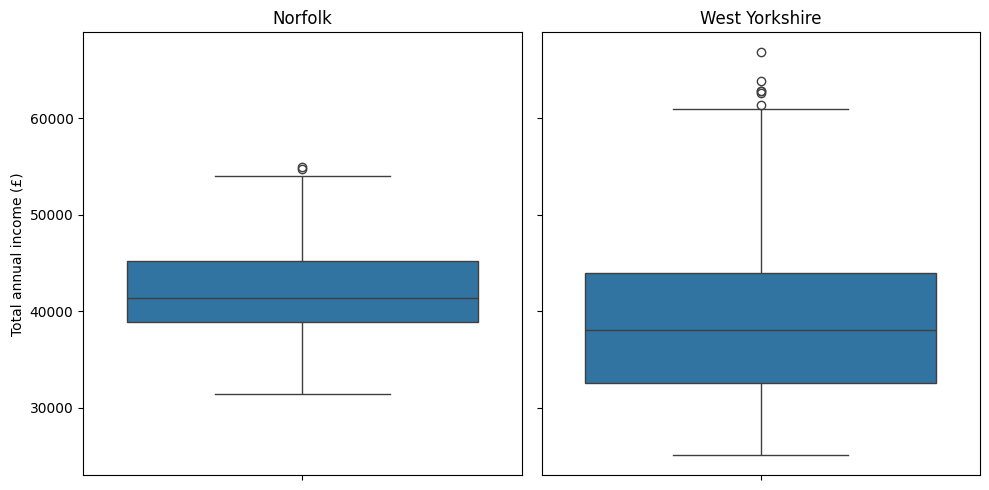

In [29]:
#Boxplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), sharey = True)
sns.boxplot(NorfolkIncome['Total annual income (£)'], ax = axes[0]).set_title('Norfolk')
sns.boxplot(WestYorIncome['Total annual income (£)'], ax = axes[1]).set_title('West Yorkshire')
plt.tight_layout()
plt.show()

As per the minimum and maximum values in the descriptive statistics, the above box plots demonstrate a difference in the income variable for Norfolk and West Yorkshire. West Yorkshire MSOAs have a greater range of total household estimated annual income than Norfolk. West Yorkshire also displays a wider interquartile range than Norfolk, meaning there is a greater spread of income, but at lower values on average. This is supported by the lower median value of income for West Yorkshire.

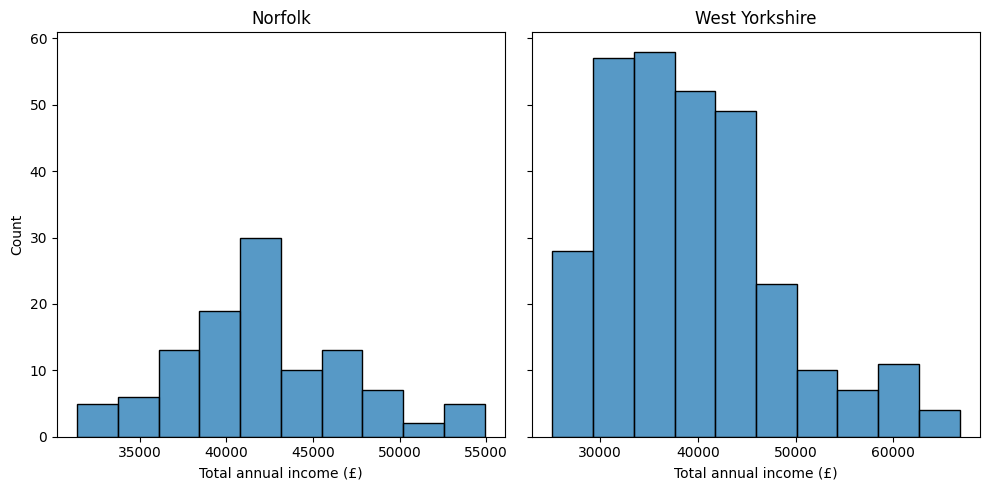

In [30]:
#Histograms
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), sharey = True)
sns.histplot(NorfolkIncome['Total annual income (£)'], ax = axes[0], bins = 10).set_title('Norfolk')
sns.histplot(WestYorIncome['Total annual income (£)'], ax = axes[1], bins = 10).set_title('West Yorkshire')
plt.tight_layout()
plt.show()

The histograms show the distribution of income estimates for MSOAs in Norfolk and West Yorkshire. The y-scales are shared to allow for direct comparison, which visually shows that there are many more MSOAs in West Yorkshire than in Norfolk.  West Yorkshire income is on average, lower than Norfolk. Norfolk shows a relatively normal income distribution in comparison to West Yorkshire, which is positively (right) skewed. Thus, tests of normality will be conducted next.

##Statistical Testing of Income
First, the samples will be tested for normality with the Anderson-Darling test.

Null hypothesis: The sample distribution does not differ from a normal distribution.

Alternate hypothesis: The sample distribution does differ from a normal distribution.

In [31]:
#A/D test for Norfolk
anderson(NorfolkIncome['Total annual income (£)'], dist='norm')

AndersonResult(statistic=0.6864924093739972, critical_values=array([0.557, 0.634, 0.761, 0.888, 1.056]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=42055.454545454544, scale=4948.9798107933)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

At the critical value with 5% significance level (0.761), the Norfolk income data can be considered normally distributed.

In [32]:
#A/D test for WY
anderson(WestYorIncome['Total annual income (£)'], dist='norm')

AndersonResult(statistic=3.8029044657371287, critical_values=array([0.569, 0.648, 0.777, 0.906, 1.078]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=39382.94314381271, scale=8615.341203952103)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

At any significance level, the critical value for West Yorkshire (3.803) cannot be considered normally distributed. Therefore, a non-parametric test will be used to compare the samples. This will be a Mann-Whitney U test, which compares the medians and does not assume normality in the data.

Null hypothesis: There is no difference between the two groups in the population.

Alternative hypothesis: There is a difference between the two groups in the population.

In [33]:
stat_mannwhitney, p_value_mannwhitney = mannwhitneyu(NorfolkIncome['Total annual income (£)'], WestYorIncome['Total annual income (£)'])
print("Mann-Whitney U Test statistic:", stat_mannwhitney)
print("p-value:", p_value_mannwhitney)

Mann-Whitney U Test statistic: 21116.5
p-value: 1.0509548601490764e-05


The Mann-Whitney U test results show that due to the extremely small p-value, the null hypothesis can be rejected. So, there is a statistically significant difference in the median income of the Norfolk and West Yorkshire samples. This answers the first research question: 'Is there a difference in the average income in Norfolk and West Yorkshire?', with the difference being that income is greater in Norfolk, with this data.

##Visualising Income

Choropleth maps allow the estimated average total annual income to be visualised for each MSOA in Norfolk and West Yorkshire. First, the MSOAs will be mapped and then the Income data will be added. The next lines of code plots the income data for Norfolk and West Yorkshire.

In [34]:
#Merging the income data with MSOA data
GeoNorfolkIncome = NorfolkIncome.merge(MSOA, left_on='MSOA code', right_on='MSOA21CD', how='inner')
GeoWestYorIncome = WestYorIncome.merge(MSOA, left_on='MSOA code', right_on='MSOA21CD', how='inner')

In [35]:
#Creating the geodataframe for Income data for Norfolk MSOAs
GeoNorfolkIncome = gpd.GeoDataFrame(GeoNorfolkIncome, geometry=GeoNorfolkIncome.geometry)
#Creating the geodataframe for Income data for West Yorkshire MSOAs
GeoWestYorIncome = gpd.GeoDataFrame(GeoWestYorIncome, geometry=GeoWestYorIncome.geometry)

In [36]:
#Calculating the minimum and maximum income values allows the legends on the chloropleth maps to be identical
print(GeoNorfolkIncome['Total annual income (£)'].min())
print(GeoWestYorIncome['Total annual income (£)'].min())

print(GeoNorfolkIncome['Total annual income (£)'].max())
print(GeoWestYorIncome['Total annual income (£)'].max())

31400.0
25100.0
54900.0
66800.0


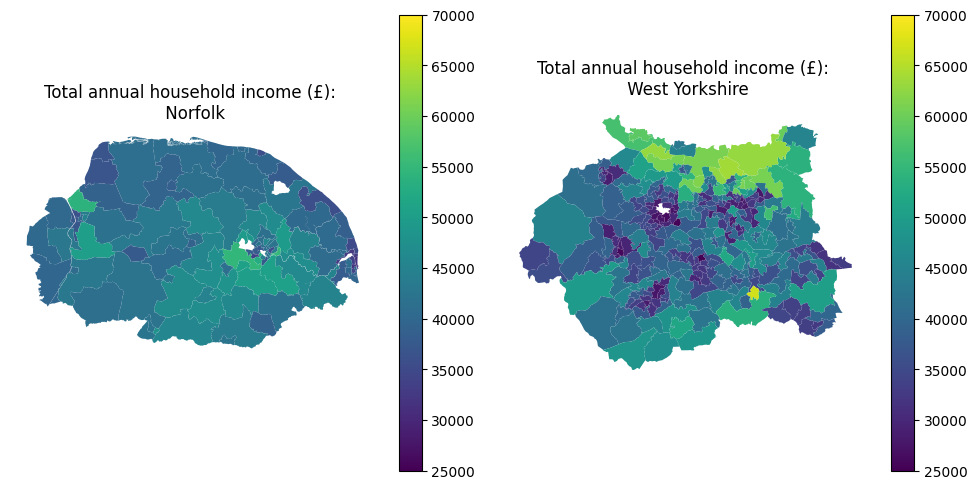

In [37]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
GeoNorfolkIncome.plot(column='Total annual income (£)', ax = axes[0], legend = True, vmin = 25000, vmax = 70000).set_title('Total annual household income (£): \n Norfolk')
GeoWestYorIncome.plot(column='Total annual income (£)', ax = axes[1], legend = True, vmin = 25000, vmax = 70000).set_title('Total annual household income (£): \n West Yorkshire')
axes[0].set_axis_off()
axes[1].set_axis_off()
plt.tight_layout()
plt.show()

The choropleth maps show the distribution of income across both counties. A continuous colour scheme has been chosen for the legends to represent income, which is a continuous variable, and also so a direct comparison can be made of the two counties. The white spaces show where there is missing data for 5 MSOAs.

The broader variation in colouring for Income estimates in West Yorkshire demonstrates the wider range, which reinforces the wider range in the box plot. Norfolk has a much more consistent colouring, as expected by its narrower range.

Norfolk's highest income estimates can be seen around the city centre, but not at values as high as those some in West Yorkshire MSOAs. Around King's Lynn also has some lighter colouring, but on the whole Norfolk appears more consistent in its values. There are some darker shaded MSOAs around Norwich, and some towards the Eastern coast around the Great Yarmouth area.

The most northern MSOAs in West Yorkshire have the highest income estimates across both counties, other than the one MSOA in the South-Eastern quarter, near Wakefield. Many MSOAs in the areas surrounding Leeds and Bradford are darkest in colour, demonstrating the lowest household income. Other areas around the centre of West Yorkshire display low to medium values.

##RUC
As this project is interested in the RUC of each MSOA and whether this has an effect on income, the RUC for each MSOAS in each county will be explored. As the MSOA names were initially joined to the separated Income datasets, this is how the RUC data will be joined. The counts of each classification category for the two counties can then be examined.

In [38]:
# This code looks up the RUC of a specific MSOA if needed. Put the MSOA code in the second brackets and the RUC is returned.
RUC[RUC['MSOA code'].str.contains('E02005506')]

,FID,MSOA code,MSOA11NM,RUC11CD,Rural/Urban Classification,geometry
5234,5235,E02005506,Breckland 004,E1,Rural village and dispersed,None


In [39]:
RUC.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   FID                         7201 non-null   int32   
 1   MSOA code                   7201 non-null   object  
 2   MSOA11NM                    7201 non-null   object  
 3   RUC11CD                     7201 non-null   object  
 4   Rural/Urban Classification  7201 non-null   object  
 5   geometry                    0 non-null      geometry
dtypes: geometry(1), int32(1), object(4)
memory usage: 309.5+ KB


In [40]:
#Extracting the MSOA codes for each county
NorfolkRUC = RUC[RUC['MSOA code'].isin(NorfolkIncome['MSOA code'])]
WestYorRUC = RUC[RUC['MSOA code'].isin(WestYorIncome['MSOA code'])]

In [41]:
# Counting the MSOAs in each category
NorfolkRUCcount = NorfolkRUC['MSOA code'].groupby(NorfolkRUC['Rural/Urban Classification']).count()
WestYorRUCcount = WestYorRUC['MSOA code'].groupby(WestYorRUC['Rural/Urban Classification']).count()

In [42]:
#Displaying results for comparison
TotalRUC = pd.concat([NorfolkRUCcount, WestYorRUCcount], axis = 1)
TotalRUC

,MSOA code,MSOA code
Rural/Urban Classification,,
Rural town and fringe,16.0,23.0
Rural town and fringe in a sparse setting,4.0,NaN
Rural village and dispersed,38.0,3.0
Rural village and dispersed in a sparse setting,2.0,NaN
Urban city and town,50.0,41.0
Urban major conurbation,NaN,232.0


The above table shows the counts for MSOAs in each RUC category. Norfolk is on the left, and West Yorkshire on the right.
Norfolk contains 60 MSOAs under rural classification, and 50 urban.
West Yorkshire contains 26 rural, and 273 urban. This includes 232 classified as 'Urban major conurbation', and Norfolk has no MSOAs in this category. Therefore, West Yorkshire can be referred to as being a more urban county compared to Norfolk.

This answers the second research question, 'How does the Rural/Urban Classification of Norfolk and West Yorkshire MSOAs differ?'.

##Aggregating and Visualising the Vehicles Dataset


The Vehicles and TTW datasets are categorical. Thus, the values need to be aggregated to be able to visualise and analyse their effect on income.

First, the Vehicles data will be aggregated. This will be by calculating the proportion of households with access to at least 1 car or van in each MSOA. The observations of the three categories of '1 car or van in household', '2 cars or vans in household' and '3 or more cars or vans in household' will be added together to indicate the total number of households with access to at least 1 vehicle. The value of 'No cars or vans in household' will be added to this to create a grand total number of observations.

These two values will be used to calculate a proportion, which accounts for how many households have access to at least one car out of all households in each MSOA.

First, this the Norfolk Vehicles dataset is aggregated, and then the West Yorkshire Vehicles dataset.

Norfolk:

In [43]:
NorfolkIncomeVehicles.columns

Index(['MSOA code', 'MSOA name', 'Local authority code',
       'Local authority name', 'Region code', 'Region name',
       'Total annual income (£)', 'Upper confidence limit (£)',
       'Lower confidence limit (£)', 'Confidence interval (£)',
       'Car or van availability (5 categories) Code',
       'Car or van availability (5 categories)', 'Vehicles Observation'],
      dtype='object')

In [44]:
NorfolkIncomeVehicles['Car or van availability (5 categories)'].unique

<bound method Series.unique of 3800           No cars or vans in household
3800              1 car or van in household
3800            2 cars or vans in household
3800    3 or more cars or vans in household
3801           No cars or vans in household
                       ...                 
3908    3 or more cars or vans in household
3909           No cars or vans in household
3909              1 car or van in household
3909            2 cars or vans in household
3909    3 or more cars or vans in household
Name: Car or van availability (5 categories), Length: 431, dtype: object>

In [45]:
NorfolkIncomeVehicles['Car or van availability (5 categories) Code'].unique

<bound method Series.unique of 3800    0.0
3800    1.0
3800    2.0
3800    3.0
3801    0.0
       ... 
3908    3.0
3909    0.0
3909    1.0
3909    2.0
3909    3.0
Name: Car or van availability (5 categories) Code, Length: 431, dtype: float64>

In [46]:
NCars = NorfolkIncomeVehicles[['MSOA code', 'Car or van availability (5 categories) Code',
                                  'Car or van availability (5 categories)', 'Vehicles Observation']]

TotalNorfolkCars = NCars[NCars['Car or van availability (5 categories) Code'].isin([1.0, 2.0, 3.0])]
NorfolkNonCars = NCars[NCars['Car or van availability (5 categories) Code'].isin([0])]
TotalNorfolkCars = TotalNorfolkCars.groupby('MSOA code')['Vehicles Observation'].sum()
NorfolkNonCars = NorfolkNonCars.groupby('MSOA code')['Vehicles Observation'].sum()

In [47]:
NorfolkCarsMSOAs = pd.DataFrame(columns = ['Households with car access', 'Households without car access'])
NorfolkCarsMSOAs['Households with car access'] = TotalNorfolkCars
NorfolkCarsMSOAs['Households without car access'] = NorfolkNonCars

In [48]:
# Add column which adds the total number of households (households without access + households with access)
NorfolkCarsMSOAs['Total Households'] = NorfolkCarsMSOAs['Households with car access'] + NorfolkCarsMSOAs['Households without car access']

In [49]:
NorfolkCarsMSOAs = NorfolkCarsMSOAs.reset_index()

In [50]:
#Calculating the proportion (households with access / total households)
NorfolkCarsMSOAs['Proportion with car access'] = NorfolkCarsMSOAs['Households with car access'] / NorfolkCarsMSOAs['Total Households']

In [51]:
#Checking it worked
NorfolkCarsMSOAs.head(2)

,MSOA code,Households with car access,Households without car access,Total Households,Proportion with car access
0,E02005503,2870.0,252.0,3122.0,0.919283
1,E02005504,3681.0,314.0,3995.0,0.921402


In [52]:
#Merging the new aggregated data back to the MSOA geometry data
GeoNorfolkVehicles = NorfolkCarsMSOAs.merge(MSOA, left_on='MSOA code', right_on='MSOA21CD', how='inner')

The exact same process for West Yorkshire:

In [53]:
WestYorIncomeVehicles.columns

Index(['MSOA code', 'MSOA name', 'Local authority code',
       'Local authority name', 'Region code', 'Region name',
       'Total annual income (£)', 'Upper confidence limit (£)',
       'Lower confidence limit (£)', 'Confidence interval (£)',
       'Car or van availability (5 categories) Code',
       'Car or van availability (5 categories)', 'Vehicles Observation'],
      dtype='object')

In [54]:
WYCars = WestYorIncomeVehicles[['MSOA code', 'Car or van availability (5 categories) Code',
                                  'Car or van availability (5 categories)', 'Vehicles Observation']]

TotalWestYorCars = WYCars[WYCars['Car or van availability (5 categories) Code'].isin([1.0, 2.0, 3.0])]
WestYorNonCars = WYCars[WYCars['Car or van availability (5 categories) Code'].isin([0])]
TotalWestYorCars = TotalWestYorCars.groupby('MSOA code')['Vehicles Observation'].sum()
WestYorNonCars = WestYorNonCars.groupby('MSOA code')['Vehicles Observation'].sum()

In [55]:
WestYorCarsMSOAs = pd.DataFrame(columns = ['Households with car access', 'Households without car access'])
WestYorCarsMSOAs['Households with car access'] = TotalWestYorCars
WestYorCarsMSOAs['Households without car access'] = WestYorNonCars

In [56]:
# Add column which adds the total number of households
WestYorCarsMSOAs['Total Households'] = WestYorCarsMSOAs['Households with car access'] + WestYorCarsMSOAs['Households without car access']

In [57]:
WestYorCarsMSOAs = WestYorCarsMSOAs.reset_index()

In [58]:
#Calculating the proportion
WestYorCarsMSOAs['Proportion with car access'] = WestYorCarsMSOAs['Households with car access'] / WestYorCarsMSOAs['Total Households']

In [59]:
#Checking it worked
WestYorCarsMSOAs.head(2)

,MSOA code,Households with car access,Households without car access,Total Households,Proportion with car access
0,E02002183,2386.0,374.0,2760.0,0.864493
1,E02002184,4797.0,1034.0,5831.0,0.822672


In [60]:
#Merging the new aggregated data back to the MSOA geometry data
GeoWestYorVehicles = WestYorCarsMSOAs.merge(MSOA, left_on='MSOA code', right_on='MSOA21CD', how='inner')

In [61]:
#Creates the geodataframes to enable map visualisations of the new aggregated proportions
mapGeoNorfolkVehicles = gpd.GeoDataFrame(GeoNorfolkVehicles, geometry=GeoNorfolkVehicles.geometry)
mapGeoWestYorVehicles = gpd.GeoDataFrame(GeoWestYorVehicles, geometry=GeoWestYorVehicles.geometry)

In [62]:
#Calculating the minimum and maximum income values allows the legends on the chloropleth maps to be identical
print(mapGeoNorfolkVehicles['Proportion with car access'].min())
print(mapGeoWestYorVehicles['Proportion with car access'].min())

print(mapGeoNorfolkVehicles['Proportion with car access'].max())
print(mapGeoWestYorVehicles['Proportion with car access'].max())

0.46401925391095067
0.33092948717948717
0.9386773547094188
0.9283211213762345


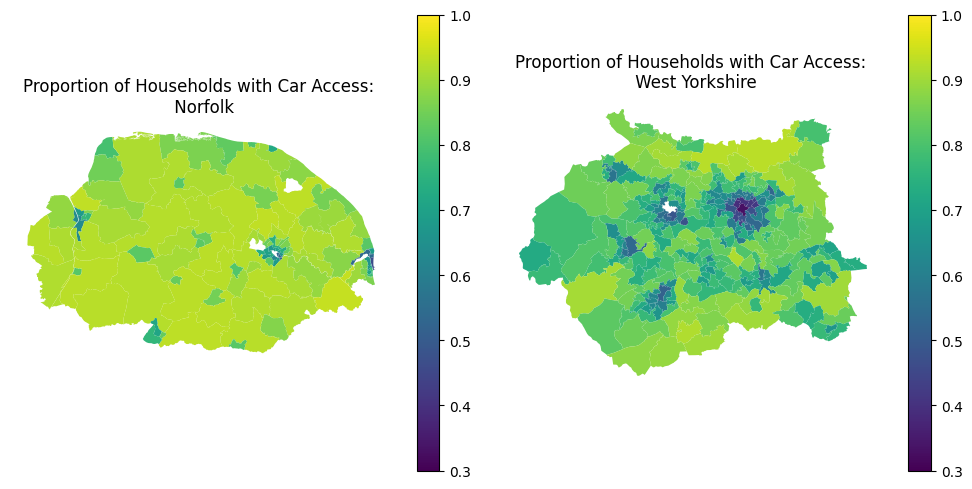

In [63]:
#Plotting the Car Access for N and WY for comparison
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
mapGeoNorfolkVehicles.plot(column ='Proportion with car access', ax = axes[0], legend = True,  vmin = 0.3, vmax = 1).set_title('Proportion of Households with Car Access: \n Norfolk')
mapGeoWestYorVehicles.plot(column ='Proportion with car access', ax = axes[1], legend = True,  vmin = 0.3, vmax = 1).set_title('Proportion of Households with Car Access: \n West Yorkshire')
axes[0].set_axis_off()
axes[1].set_axis_off()
plt.tight_layout()
plt.show()

Norfolk displays a much more consistent pattern of access to cars. Across the whole county, it appears that the majority of MSOAs have 90% or above of households which have access to at least one car. There is a very slight decrease in this proportion in MSOAs around urban areas in Norwich, King's Lynn, Great Yarmouth and Thetford. In comparison, West Yorkshire has a much wider range in its proportions. The MSOAs with low proportions of access to car, indicated by the darker shades, are clustered around the urban areas of Halifax, Bradford, Wakefield, Huddersfield and especially Leeds. Overall, Norfolk MSOAs has much greater levels of vehicle accessibility than West Yorkshire.


##Aggregating and Visualising the Travel to Work Dataset
Next, the TTW dataset is aggregated for both counties, Norfolk then West Yorkshire.

In [64]:
NorfolkIncomeTTW.head(3)

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Total annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),Method used to travel to workplace (12 categories) Code,Method used to travel to workplace (12 categories),TTW Observation
3800,E02005503,Breckland 001,E07000143,Breckland,E12000006,East,46200.0,"54,600","39,100","15,500",1.0,Work mainly at or from home,991.0
3800,E02005503,Breckland 001,E07000143,Breckland,E12000006,East,46200.0,"54,600","39,100","15,500",2.0,"Underground, metro, light rail, tram",2.0
3800,E02005503,Breckland 001,E07000143,Breckland,E12000006,East,46200.0,"54,600","39,100","15,500",3.0,Train,6.0


In [65]:
NorfolkIncomeTTW['Method used to travel to workplace (12 categories)'].unique()

array(['Work mainly at or from home',
       'Underground, metro, light rail, tram', 'Train',
       'Bus, minibus or coach', 'Taxi', 'Motorcycle, scooter or moped',
       'Driving a car or van', 'Passenger in a car or van', 'Bicycle',
       'On foot', 'Other method of travel to work',
       'Not in employment or aged 15 years and under', nan], dtype=object)

The possible categories of Travel to Work Methods are listed above. As there are 12 categories, to simplify their visualisation they will be aggregated into public transport, private transport and active transport. Working from home will remain in its own category, as will 'Not in employment or aged 15 years and under'. The observations with 'Other method of travel to work' will be removed as this method of transport cannot be assumed, which is categorised as value 11.0.

Once aggregated, the most common category of TTW for each MSOA will be visualised with a choropleth map.

In [66]:
NorfolkIncomeTTW.columns

Index(['MSOA code', 'MSOA name', 'Local authority code',
       'Local authority name', 'Region code', 'Region name',
       'Total annual income (£)', 'Upper confidence limit (£)',
       'Lower confidence limit (£)', 'Confidence interval (£)',
       'Method used to travel to workplace (12 categories) Code',
       'Method used to travel to workplace (12 categories)',
       'TTW Observation'],
      dtype='object')

In [67]:
NorfolkIncomeTTW['Method used to travel to workplace (12 categories) Code'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., nan])

In [68]:
# Creating a new dataset to aggregate, and dropping the 'Other' category 11.0
NTTW = NorfolkIncomeTTW[['MSOA code', 'Method used to travel to workplace (12 categories) Code',
                         'Method used to travel to workplace (12 categories)', 'TTW Observation']]

NTTW['Method used to travel to workplace (12 categories) Code'] = (NTTW['Method used to travel to workplace (12 categories) Code'].replace(11.0, pd.NA))
NTTW.dropna(inplace=True)

<ipython-input-68-72de098ed4bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NTTW['Method used to travel to workplace (12 categories) Code'] = (NTTW['Method used to travel to workplace (12 categories) Code'].replace(11.0, pd.NA))
<ipython-input-68-72de098ed4bd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NTTW.dropna(inplace=True)


In [69]:
#Filtering each new label into their new categories (public, private, active)
WFH = NTTW[NTTW['Method used to travel to workplace (12 categories) Code'] == 1.0]
PublicTrans = NTTW[NTTW['Method used to travel to workplace (12 categories) Code'].isin([2.0, 3.0, 4.0])]
PrivTrans = NTTW[NTTW['Method used to travel to workplace (12 categories) Code'].isin([5.0, 6.0, 7.0, 8.0])]
ActTrans = NTTW[NTTW['Method used to travel to workplace (12 categories) Code'].isin([9.0, 10.0])]
NotEmp = NTTW[NTTW['Method used to travel to workplace (12 categories) Code'].isin([12.0])]

In [70]:
#Adding the total observations of new aggregated groups to see totals of each cateogory for each MSOA
WFH = WFH.groupby('MSOA code')['TTW Observation'].sum()
PublicTrans = PublicTrans.groupby('MSOA code')['TTW Observation'].sum()
PrivTrans = PrivTrans.groupby('MSOA code')['TTW Observation'].sum()
ActTrans = ActTrans.groupby('MSOA code')['TTW Observation'].sum()
NotEmp = NotEmp.groupby('MSOA code')['TTW Observation'].sum()

In [71]:
#Creating a dataframe of the new groups to be able to plot
AggNTTW = pd.DataFrame({
    'Works mainly at or from home': WFH,
    'Public Transport': PublicTrans,
    'Private Transport': PrivTrans,
    'Active Transport': ActTrans,
    'Not in Employment': NotEmp
    })

In [72]:
#Joining the geopackage data back on
GeoNorfolkTTW = AggNTTW.merge(MSOA, left_on='MSOA code', right_on='MSOA21CD', how='inner')

In [73]:
#Creating a geodataframe
mapGeoNorfolkTTW = gpd.GeoDataFrame(GeoNorfolkTTW, geometry=GeoNorfolkTTW.geometry)

In [74]:
mapGeoNorfolkTTW.columns

Index(['Works mainly at or from home', 'Public Transport', 'Private Transport',
       'Active Transport', 'Not in Employment', 'MSOA21CD', 'MSOA21NM',
       'MSOA21NMW', 'BNG_E', 'BNG_N', 'LAT', 'LONG', 'GlobalID', 'geometry'],
      dtype='object')

The minimum and maximum values of each category are calculated for both this dataset, NTTW, and for the West Yorkshire (WYTTW) following this section. The vmin and vmax will then be the same for each separate category, so the two counties can be directly compared.

In [75]:
#Calculating vmin and vmax to plot legends
print(AggNTTW.min())
print(AggNTTW.max())

Works mainly at or from home     256.0
Public Transport                  28.0
Private Transport                955.0
Active Transport                 111.0
Not in Employment               2531.0
dtype: float64
Works mainly at or from home    2357.0
Public Transport                 456.0
Private Transport               3957.0
Active Transport                1300.0
Not in Employment               7832.0
dtype: float64


The Norfolk TTW plot is created,  but will be displayed alongside the West Yorkshire plot for comparison.

In [76]:
#Creating plot for public, private and active transport for N - it will be plotted alongside WY
figNTTW, axes = plt.subplots(nrows = 3, ncols = 1, figsize=(10, 20))
figNTTW.suptitle('Distribution of Travel to Work Method Across Norfolk')
mapGeoNorfolkTTW.plot(column = 'Public Transport', ax = axes[0], legend = True, vmin=25, vmax=700).set_axis_off()
mapGeoNorfolkTTW.plot(column = 'Private Transport', ax = axes[1], legend = True, vmin=650, vmax=4000).set_axis_off()
mapGeoNorfolkTTW.plot(column = 'Active Transport', ax = axes[2], legend = True, vmin=60, vmax=1300).set_axis_off()
axes[0].set_title('Public Transport')
axes[1].set_title('Private Transport')
axes[2].set_title('Active Transport')
plt.tight_layout()
plt.close()

Now the West Yorkshire TTW dataset will be aggregated in the same way.

In [77]:
WestYorIncomeTTW.head(3)

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Total annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),Method used to travel to workplace (12 categories) Code,Method used to travel to workplace (12 categories),TTW Observation
1657,E02002183,Bradford 001,E08000032,Bradford,E12000003,Yorkshire,56800.0,"68,700","46,900","21,800",1.0,Work mainly at or from home,1098.0
1657,E02002183,Bradford 001,E08000032,Bradford,E12000003,Yorkshire,56800.0,"68,700","46,900","21,800",2.0,"Underground, metro, light rail, tram",0.0
1657,E02002183,Bradford 001,E08000032,Bradford,E12000003,Yorkshire,56800.0,"68,700","46,900","21,800",3.0,Train,40.0


In [78]:
WestYorIncomeTTW.columns

Index(['MSOA code', 'MSOA name', 'Local authority code',
       'Local authority name', 'Region code', 'Region name',
       'Total annual income (£)', 'Upper confidence limit (£)',
       'Lower confidence limit (£)', 'Confidence interval (£)',
       'Method used to travel to workplace (12 categories) Code',
       'Method used to travel to workplace (12 categories)',
       'TTW Observation'],
      dtype='object')

In [79]:
WestYorIncomeTTW['Method used to travel to workplace (12 categories) Code'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., nan])

In [80]:
#Dropping the 'Other' category 11.0
WYTTW = WestYorIncomeTTW[['MSOA code', 'Method used to travel to workplace (12 categories) Code',
                         'Method used to travel to workplace (12 categories)', 'TTW Observation']]

WYTTW['Method used to travel to workplace (12 categories) Code'] = (WYTTW['Method used to travel to workplace (12 categories) Code'].replace(11.0, pd.NA))
WYTTW.dropna(inplace=True)

<ipython-input-80-d9a5bb6e68aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WYTTW['Method used to travel to workplace (12 categories) Code'] = (WYTTW['Method used to travel to workplace (12 categories) Code'].replace(11.0, pd.NA))
<ipython-input-80-d9a5bb6e68aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WYTTW.dropna(inplace=True)


In [81]:
#Filtering each new label (adding 2 to the end of each variable to not overwrite the same as made with Norfolk)
WFH2 = WYTTW[WYTTW['Method used to travel to workplace (12 categories) Code'] == 1.0]
PublicTrans2 = WYTTW[WYTTW['Method used to travel to workplace (12 categories) Code'].isin([2.0, 3.0, 4.0])]
PrivTrans2 = WYTTW[WYTTW['Method used to travel to workplace (12 categories) Code'].isin([5.0, 6.0, 7.0, 8.0])]
ActTrans2 = WYTTW[WYTTW['Method used to travel to workplace (12 categories) Code'].isin([9.0, 10.0])]
NotEmp2 = WYTTW[WYTTW['Method used to travel to workplace (12 categories) Code'].isin([12.0])]

In [82]:
#Adding the total observations of new aggregated groups to see totals of each cateogory for each MSOA
WFH2 = WFH2.groupby('MSOA code')['TTW Observation'].sum()
PublicTrans2 = PublicTrans2.groupby('MSOA code')['TTW Observation'].sum()
PrivTrans2 = PrivTrans2.groupby('MSOA code')['TTW Observation'].sum()
ActTrans2 = ActTrans2.groupby('MSOA code')['TTW Observation'].sum()
NotEmp2 = NotEmp2.groupby('MSOA code')['TTW Observation'].sum()

In [83]:
#Creating a dataframe of the new groups to be able to plot
AggWYTTW = pd.DataFrame({
    'Works mainly at or from home': WFH2,
    'Public Transport': PublicTrans2,
    'Private Transport': PrivTrans2,
    'Active Transport': ActTrans2,
    'Not in Employment': NotEmp2
    })

In [84]:
#Joining the geopackage data back on
GeoWestYorTTW = AggWYTTW.merge(MSOA, left_on='MSOA code', right_on='MSOA21CD', how='inner')

In [85]:
#Creating a geodataframe
mapGeoWestYorTTW = gpd.GeoDataFrame(GeoWestYorTTW, geometry=GeoWestYorTTW.geometry)

In [86]:
#Calculating vmin and vmax to plot legend consistent with the Norfolk TTW data
print(AggWYTTW.min())
print(AggWYTTW.max())

Works mainly at or from home     268.0
Public Transport                  50.0
Private Transport                696.0
Active Transport                  68.0
Not in Employment               2754.0
dtype: float64
Works mainly at or from home    3038.0
Public Transport                 692.0
Private Transport               3887.0
Active Transport                1243.0
Not in Employment               9908.0
dtype: float64


In [87]:
#Creating plot for public, private and active transport for WY - to be plotted with N
figWYTTW, axes = plt.subplots(nrows = 3, ncols = 1, figsize=(10,20))
figWYTTW.suptitle('Distribution of Travel to Work Method Across West Yorkshire')
mapGeoWestYorTTW.plot(column = 'Public Transport', ax = axes[0], legend = True, vmin=25, vmax=700).set_axis_off()
mapGeoWestYorTTW.plot(column = 'Private Transport', ax = axes[1], legend = True, vmin=650, vmax=4000).set_axis_off()
mapGeoWestYorTTW.plot(column = 'Active Transport', ax = axes[2], legend = True, vmin=60, vmax=1300).set_axis_off()
axes[0].set_title('Public Transport')
axes[1].set_title('Private Transport')
axes[2].set_title('Active Transport')
plt.tight_layout()
plt.close()

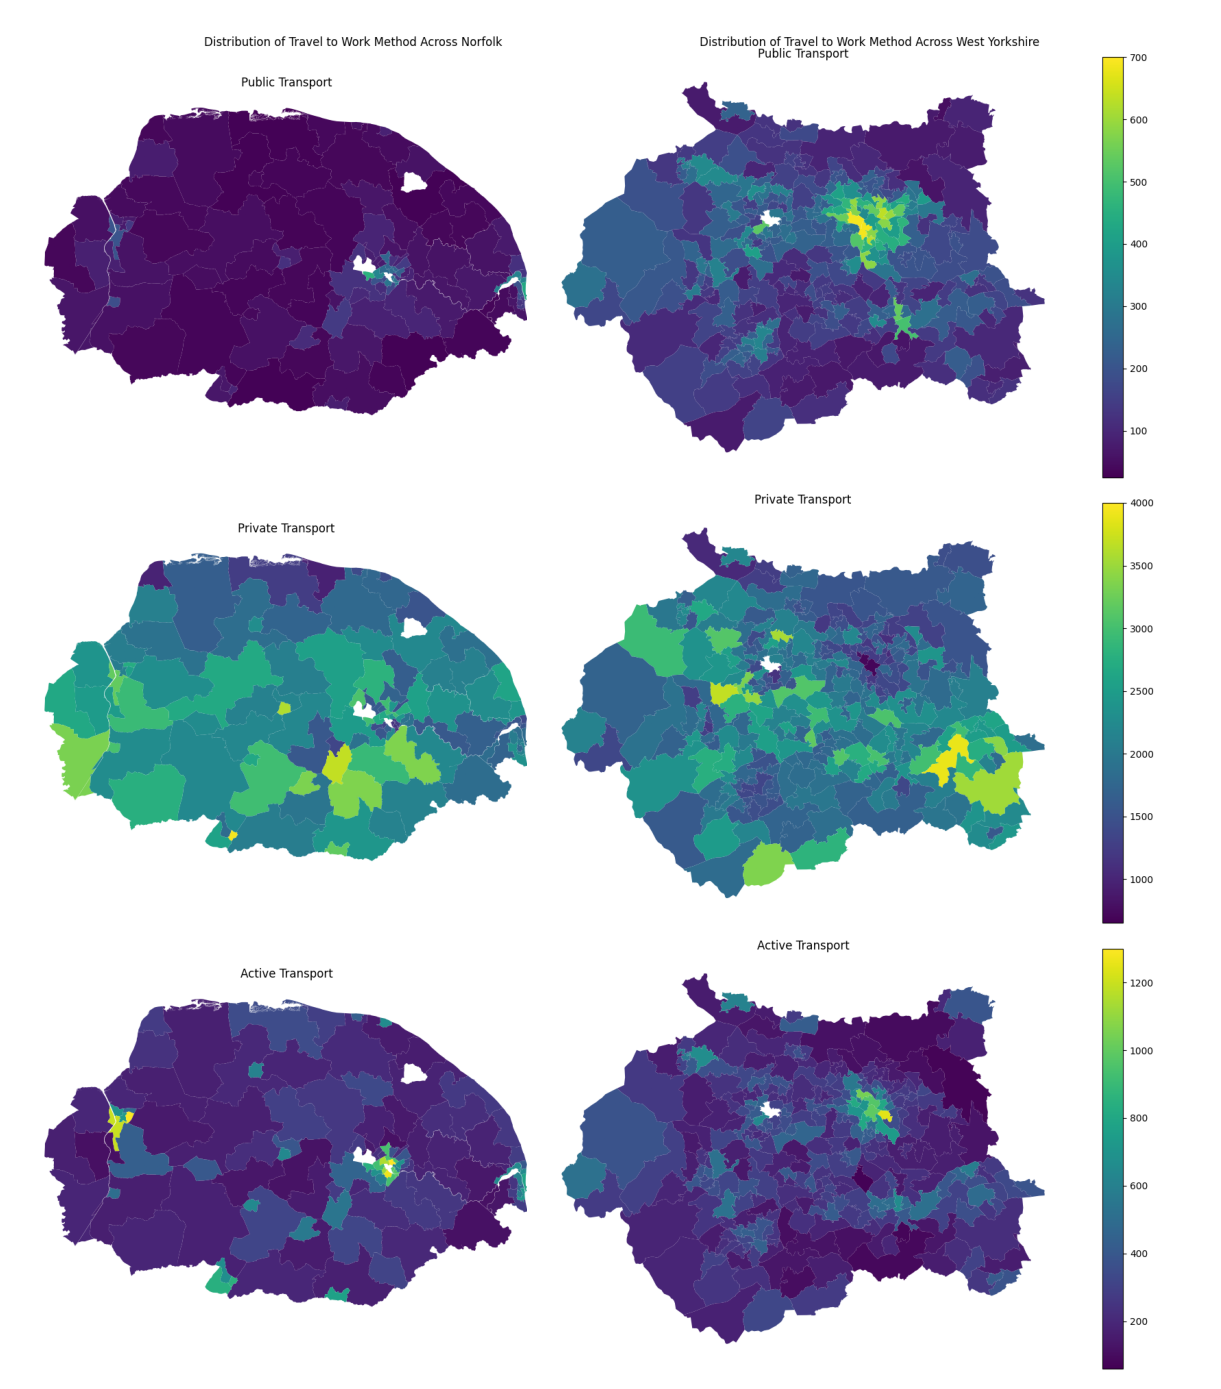

In [88]:
#Saving and plotting figures side by side for comparison
figNTTW.savefig('figNTTW.png')
figWYTTW.savefig('figWYTTW.png')

fig = plt.figure(figsize=(22,14))
image1 = plt.subplot(121)
image2 = plt.subplot(111)

NTTWimg = mpimg.imread('figNTTW.png')
WYTTWimg = mpimg.imread('figWYTTW.png')

one = image1.imshow(NTTWimg)
two = image2.imshow(WYTTWimg)

image1.set_axis_off()
image2.set_axis_off()
plt.tight_layout()
plt.show()

The side by side plot shows that the distribution of Travel to Work methods vary across Norfolk and West Yorkshire, for public, private and active transport methods. The scales are consistent for each horizontal category which allows the counties to still be compared for each transport type. With an initial glance, the greatest difference between counties can be seen with public transport use for TTW methods, with it being extremely lower in Norfolk than in West Yorkshire.

Looking at public transport as a household's main TTW method, there is a stark difference between counties. Norfolk is almost entirely one shade, with only a small number of MSOAs around Norwich showing any difference. Urban areas King's Lynn and Great Yarmouth show evidence that some households use public transport as their main TTW method with a slightly lighter shading, but this does not appear considerable. The maximum value for any Norfolk MSOA was 456, indicating an extreme lack of public transport available in Norfolk. In comparison, West Yorkshire displays overall a much lighter shading, with the highest concentration of high observation MSOAs around Leeds. High concentration can also be seen around the urban areas of Bradford and Wakefield. In comparison, the highest value for a West Yorkshire MSOA was 692. This implies more public transport services are avaiable and there is greater usage of them in West Yorkshire, than in Norfolk.

The distribution of private transport as a main TTW appears to be similar for Norfolk and West Yorkshire. Some MSOAs are in clustered near MSOAs with similarly high observations of private transport for both counties. The North Norfolk coast has the fewest observations of private transport, indicated by the darkest shading. Similarly dark shading can be seen around Norwich, where the public transport use was greatest. In a similar and expected fashion, the dark shading around Leeds for private transport shows the opposite to what was seen with public transport. When considering the Vehicles data from previously, the MSOAs with a low proportion of access to at least one vehicle are similar to the MSOA areas where private transport is a less likely TTW method.

Finally, active transport in Norfolk is highest in the urban areas, especially Norwich and King's Lynn where the shading is brightest, indicating that around 1000 households use active transport to TTW per MSOA in these areas. MSOAs around Leeds show the greatest concentration of high active transport use, but no other area of West Yorkshire appears to show consistently high levels of active transport. The very north and south MSOAs of West Yorkshire show the lowest levels of active transport.

These findings answer the third research question, 'Is there a difference in the transport methods that people use to travel to work in Norfolk and West Yorkshire?'.

## Making all data the same level
Now all data has been explored and visualised, a final step of aggregating TTW needs to happen. This is because currently, the TTW variables are at the individual observation level. Thus, the analysis will have a risk of ecological fallacy. To make the variables the MSOA level, a proportion of active, public and private is created out of the total, and this will be at the MSOA level.

The vehicles data is already at the MSOA level as it has been aggregated to a proportion of households with car access. Income is the average total annual household income for each MSOA. RUC is categorical, at the MSOA level.

Norfolk:

In [89]:
GeoNorfolkTTW.columns

Index(['Works mainly at or from home', 'Public Transport', 'Private Transport',
       'Active Transport', 'Not in Employment', 'MSOA21CD', 'MSOA21NM',
       'MSOA21NMW', 'BNG_E', 'BNG_N', 'LAT', 'LONG', 'GlobalID', 'geometry'],
      dtype='object')

In [90]:
#Creating new dataset and calculating a total
NTTWproportion = GeoNorfolkTTW[['Public Transport', 'Private Transport', 'Active Transport', 'MSOA21CD']]
NTTWproportion['Total'] = NTTWproportion['Active Transport'] + NTTWproportion['Private Transport'] + NTTWproportion['Public Transport']

<ipython-input-90-5b02374bbac8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NTTWproportion['Total'] = NTTWproportion['Active Transport'] + NTTWproportion['Private Transport'] + NTTWproportion['Public Transport']


In [91]:
#Creating Proportions
NTTWproportion['Active Transport Prop'] = NTTWproportion['Active Transport'] / NTTWproportion['Total']
NTTWproportion['Private Transport Prop'] = NTTWproportion['Private Transport'] / NTTWproportion['Total']
NTTWproportion['Public Transport Prop'] = NTTWproportion['Public Transport'] / NTTWproportion['Total']

<ipython-input-91-d6c5b5202a76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NTTWproportion['Active Transport Prop'] = NTTWproportion['Active Transport'] / NTTWproportion['Total']
<ipython-input-91-d6c5b5202a76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NTTWproportion['Private Transport Prop'] = NTTWproportion['Private Transport'] / NTTWproportion['Total']
<ipython-input-91-d6c5b5202a76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [92]:
#Checking it worked with a couple of rows
NTTWproportion.head(2)

,Public Transport,Private Transport,Active Transport,MSOA21CD,Total,Active Transport Prop,Private Transport Prop,Public Transport Prop
0,31.0,2086.0,294.0,E02005503,2411.0,0.121941,0.865201,0.012858
1,49.0,2671.0,167.0,E02005504,2887.0,0.057846,0.925182,0.016973


West Yorkshire:

In [93]:
GeoWestYorTTW.columns

Index(['Works mainly at or from home', 'Public Transport', 'Private Transport',
       'Active Transport', 'Not in Employment', 'MSOA21CD', 'MSOA21NM',
       'MSOA21NMW', 'BNG_E', 'BNG_N', 'LAT', 'LONG', 'GlobalID', 'geometry'],
      dtype='object')

In [94]:
WYTTWproportion = GeoWestYorTTW[['Public Transport', 'Private Transport', 'Active Transport', 'MSOA21CD']]
WYTTWproportion['Total'] = WYTTWproportion['Active Transport'] + WYTTWproportion['Private Transport'] + WYTTWproportion['Public Transport']

<ipython-input-94-f33133614b83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WYTTWproportion['Total'] = WYTTWproportion['Active Transport'] + WYTTWproportion['Private Transport'] + WYTTWproportion['Public Transport']


In [95]:
WYTTWproportion['Active Transport Prop'] = WYTTWproportion['Active Transport'] / WYTTWproportion['Total']
WYTTWproportion['Private Transport Prop'] = WYTTWproportion['Private Transport'] / WYTTWproportion['Total']
WYTTWproportion['Public Transport Prop'] = WYTTWproportion['Public Transport'] / WYTTWproportion['Total']

<ipython-input-95-5af655188cbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WYTTWproportion['Active Transport Prop'] = WYTTWproportion['Active Transport'] / WYTTWproportion['Total']
<ipython-input-95-5af655188cbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WYTTWproportion['Private Transport Prop'] = WYTTWproportion['Private Transport'] / WYTTWproportion['Total']
<ipython-input-95-5af655188cbf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [96]:
WYTTWproportion.head(2)

,Public Transport,Private Transport,Active Transport,MSOA21CD,Total,Active Transport Prop,Private Transport Prop,Public Transport Prop
0,74.0,1032.0,154.0,E02002183,1260.0,0.122222,0.819048,0.058730
1,236.0,2192.0,610.0,E02002184,3038.0,0.200790,0.721527,0.077683


##Creating Final Datasets to use in Analysis

The final datasets used for analysis will be separated into Norfolk and West Yorkshire. This is to make visualising the spatial analysis easier, as both counties are not located close to one another. Also, it is to examine the effect of the independent variables on income, to see how it differs between counties as there is a different level of rural and urban classified MSOAs. Each dataset will contain rows of each MSOA, as well as the associated variables which will be sourced from the previously aggregated datasets:`

*   MSOA Code and Name
*   Average Total Annual Household Income Estimate (£) in MSOA
*   Proportion of Households with Access to at least 1 Vehicle in MSOA
*   Proportion of TTW Methods for each MSOA (public, private and active)
*   Rural/Urban Classification
*   The Geometry Information



The final Norfolk dataset will be created and then West Yorkshire.

Norfolk:

In [97]:
#Collating the necessary columns from each dataset ready to join
finalNorfolkIncome = NorfolkIncome[['MSOA code', 'MSOA name', 'Total annual income (£)']]
finalNorfolkCarsMSOAs = NorfolkCarsMSOAs[['MSOA code', 'Proportion with car access']]
finalGeoNorfolkTTW = NTTWproportion[['MSOA21CD', 'Active Transport Prop', 'Private Transport Prop', 'Public Transport Prop']]
finalRUCN = RUC[['MSOA code', 'Rural/Urban Classification']]
finalMSOAN = MSOA[['MSOA21CD', 'geometry', 'LAT', 'LONG']]

In [98]:
#Creating final dataset by merging the above
NORFOLK = finalNorfolkIncome.merge(finalNorfolkCarsMSOAs, left_on='MSOA code', right_on='MSOA code', how='inner')
NORFOLK = NORFOLK.merge(finalGeoNorfolkTTW, left_on='MSOA code', right_on='MSOA21CD', how = 'inner')
NORFOLK = NORFOLK.merge(finalRUCN, left_on='MSOA code', right_on='MSOA code', how = 'inner')
NORFOLK = NORFOLK.merge(finalMSOAN, left_on='MSOA code', right_on='MSOA21CD', how = 'inner')

In [99]:
NORFOLK.columns

Index(['MSOA code', 'MSOA name', 'Total annual income (£)',
       'Proportion with car access', 'MSOA21CD_x', 'Active Transport Prop',
       'Private Transport Prop', 'Public Transport Prop',
       'Rural/Urban Classification', 'MSOA21CD_y', 'geometry', 'LAT', 'LONG'],
      dtype='object')

In [100]:
#Dropping identical MSOA columns
NORFOLK = NORFOLK.drop(columns='MSOA21CD_x')
NORFOLK = NORFOLK.drop(columns='MSOA21CD_y')

In [101]:
#Creating the dummy variables for the RUC
RUC_dummies_N = pd.get_dummies(NORFOLK['Rural/Urban Classification'], prefix = 'RUC_')
RUC_dummies_N = RUC_dummies_N.astype(int)

West Yorkshire:

In [102]:
#collating the necessary columns from each dataset ready to join
finalWestYorIncome = WestYorIncome[['MSOA code', 'MSOA name', 'Total annual income (£)']]
finalWestYorCarsMSOAs = WestYorCarsMSOAs[['MSOA code', 'Proportion with car access']]
finalGeoWestYorTTW= WYTTWproportion[['MSOA21CD', 'Active Transport Prop', 'Private Transport Prop', 'Public Transport Prop']]
finalRUCWY = RUC[['MSOA code', 'Rural/Urban Classification']]
finalMSOAWY = MSOA[['MSOA21CD', 'geometry', 'LAT', 'LONG']]

#finalMSOA = MSOA[['MSOA21CD', 'geometry', 'BNG_E', 'BNG_N', 'LAT', 'LONG', 'GlobalID']]

In [103]:
#Creating final dataset
WESTYORKSHIRE = finalWestYorIncome.merge(finalWestYorCarsMSOAs, left_on='MSOA code', right_on='MSOA code', how='inner')
WESTYORKSHIRE = WESTYORKSHIRE.merge(finalGeoWestYorTTW, left_on='MSOA code', right_on='MSOA21CD', how = 'inner')
WESTYORKSHIRE = WESTYORKSHIRE.merge(finalRUCWY, left_on='MSOA code', right_on='MSOA code', how = 'inner')
WESTYORKSHIRE = WESTYORKSHIRE.merge(finalMSOAWY, left_on='MSOA code', right_on='MSOA21CD', how = 'inner')

In [104]:
WESTYORKSHIRE.columns

Index(['MSOA code', 'MSOA name', 'Total annual income (£)',
       'Proportion with car access', 'MSOA21CD_x', 'Active Transport Prop',
       'Private Transport Prop', 'Public Transport Prop',
       'Rural/Urban Classification', 'MSOA21CD_y', 'geometry', 'LAT', 'LONG'],
      dtype='object')

In [105]:
WESTYORKSHIRE = WESTYORKSHIRE.drop(columns='MSOA21CD_x')
WESTYORKSHIRE = WESTYORKSHIRE.drop(columns='MSOA21CD_y')

In [106]:
#Creating the dummy variables for the RUC
RUC_dummies_WY = pd.get_dummies(WESTYORKSHIRE['Rural/Urban Classification'], prefix = 'RUC_')
RUC_dummies_WY = RUC_dummies_WY.astype(int)

# Data Analysis and Results

This section will justify and explain the analytical process. Results will be produced, visualised and explained with each step.

First, a heatmap of the variables for each county will be created, and then a Ordinary Least Squares (OLS) multiple linear regression model will be fitted for each county. The equation for multiple linear regression is:

$$ y_i= β_0+β_1 x_1i+…+β_m x_mi+ε_i $$

This will then allow the relationship between income, TTW categories, car access and RUC of MSOAs to be examined.  

Queen weights will be calculated for the two counties, with income as the dependent variable. Moran's I will be calulated with these weights, to check for spatial autocorrelation in the dependent variable and this will be plotted. Spatial autocorrelation will also be checked and plotted with the residuals from the linear models. If they show a spatial pattern then geographically weighted regression will then be conducted.


##Multiple Linear Regression

Norfolk

In [107]:
#Dropping LAT and LONG first
NORFOLKcorr = NORFOLK.copy()
NORFOLKcorr.drop(['LAT', 'LONG'], axis = 1, inplace = True)

<Axes: >

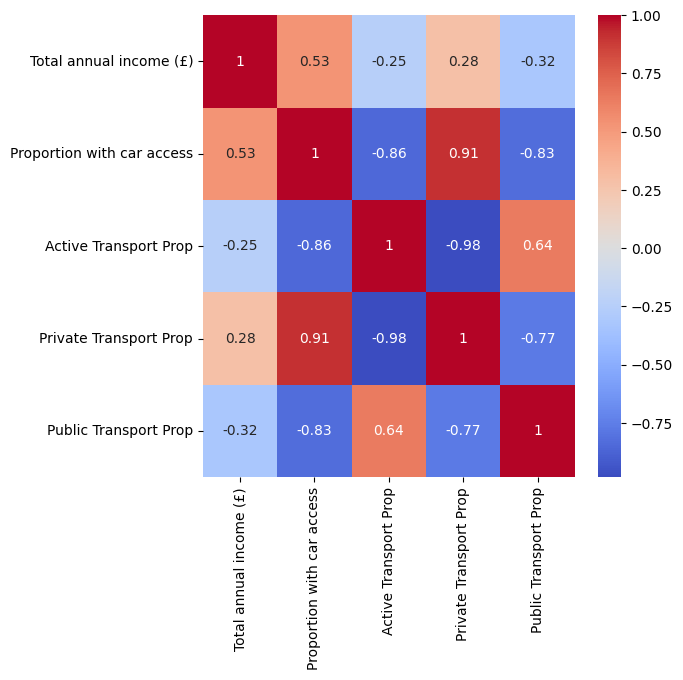

In [108]:
#Norfolk Correlation Heatmap
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(NORFOLKcorr.corr(numeric_only = True), annot = True, ax = ax, cmap = 'coolwarm')

The correlation heatmap shows that for the Norfolk data, the MSOAs with a high proportion of private transport use as a TTW method are strongly positively correlated with high car access (0.91). Income is moderately positively correlated with car access (0.53). It is negatively, but weakly correlated with active transport as a TTW method (-0.25) and public transport (-0.32). There is a moderate positive correlation between public transport and active transport (0.64). Active transport as a TTW method is strongly negatively correlated with car access (-0.86) and with private transport as a TTW method (-0.98).

Due to the extreme strength (0.91) of the correlation between private transport as a TTW method and car access, one of these variables will be excluded from the regression model. This is to avoid multicollinearity. The variable to be dropped will be 'Private Transport Prop'.

In [109]:
#Concatenating the RUC dummies
NORFOLK_mulreg = pd.concat([NORFOLK[['MSOA code', 'Total annual income (£)', 'Proportion with car access',
                                     'Public Transport Prop', 'Active Transport Prop']], RUC_dummies_N], axis = 1)

In [110]:
NORFOLK_mulreg.columns

Index(['MSOA code', 'Total annual income (£)', 'Proportion with car access',
       'Public Transport Prop', 'Active Transport Prop',
       'RUC__Rural town and fringe',
       'RUC__Rural town and fringe in a sparse setting',
       'RUC__Rural village and dispersed',
       'RUC__Rural village and dispersed in a sparse setting',
       'RUC__Urban city and town'],
      dtype='object')

In [111]:
# Multiple regression model for Norfolk

X_reg = NORFOLK_mulreg[['Proportion with car access', 'Public Transport Prop',
                        'Active Transport Prop', 'RUC__Rural town and fringe',
                        'RUC__Rural town and fringe in a sparse setting', 'RUC__Rural village and dispersed',
                        'RUC__Rural village and dispersed in a sparse setting', 'RUC__Urban city and town']]

y_reg = NORFOLK_mulreg[['Total annual income (£)']]
X_reg = sm.add_constant(X_reg)
Norfolk_mult_reg_model = sm.OLS(y_reg, X_reg).fit()

print(Norfolk_mult_reg_model.summary2())

                                         Results: Ordinary least squares
Model:                            OLS                                  Adj. R-squared:                  0.613     
Dependent Variable:               Total annual income (£)              AIC:                             2030.5299 
Date:                             2025-01-31 00:48                     BIC:                             2051.9126 
No. Observations:                 107                                  Log-Likelihood:                  -1007.3   
Df Model:                         7                                    F-statistic:                     24.95     
Df Residuals:                     99                                   Prob (F-statistic):              2.63e-19  
R-squared:                        0.638                                Scale:                           9.5039e+06
------------------------------------------------------------------------------------------------------------------
       

The results of this OLS multiple regression model show the effect of the predictor variables on Total annual income (£) for 107 Norfolk MSOAs. The R-squared value of 0.638 indicates that 63.8% of the variation in Total annual income (£) is accounted for by the variation in the model, and the adjusted R-squared is 0.613 as it accounts for the number of predictors.
The coefficients are all statistically significant (p<0.05). However, the model does not consider the spatial element of the data.

West Yorkshire:

In [112]:
#Dropping LAT and LONG first
WESTYORKSHIREcorr = WESTYORKSHIRE.copy()
WESTYORKSHIREcorr.drop(['LAT', 'LONG'], axis = 1, inplace = True)

<Axes: >

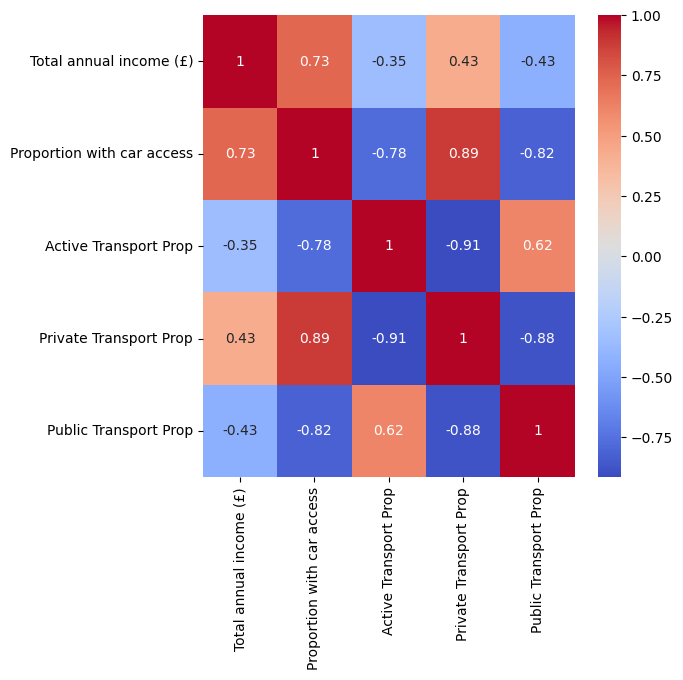

In [113]:
#West Yorkshire correlation
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(WESTYORKSHIREcorr.corr(numeric_only = True), annot = True, ax = ax, cmap = 'coolwarm')

The correlation heatmap of West Yorkshire shows that similarly to Norfolk, private transport as a TTW method and car access are strongly, positively correlated (0.89). Like the Norfolk model, 'Private Transport Prop' will be dropped to avoid multicollinearity. Similar patterns can be seen, with public transport as a TTW method and car access being negatively correlated (-0.82), and active transport as a TTW method and car access (-0.78). Income is positively correlated with car access (0.73). Active and public transport as TTW methods are moderately positively correlated (0.62).

In [114]:
WESTYORKSHIRE_mulreg = pd.concat([WESTYORKSHIRE[['MSOA code', 'Total annual income (£)', 'Proportion with car access',
                                    'Public Transport Prop', 'Active Transport Prop']], RUC_dummies_WY], axis = 1)

In [115]:
#Checking the columns as WY MSOAs have different RUC classifications
WESTYORKSHIRE_mulreg.columns

Index(['MSOA code', 'Total annual income (£)', 'Proportion with car access',
       'Public Transport Prop', 'Active Transport Prop',
       'RUC__Rural town and fringe', 'RUC__Rural village and dispersed',
       'RUC__Urban city and town', 'RUC__Urban major conurbation'],
      dtype='object')

In [116]:
# Multiple regression model for West Yorkshire

X_reg = WESTYORKSHIRE_mulreg[['Proportion with car access', 'Public Transport Prop',
                              'Active Transport Prop', 'RUC__Rural town and fringe', 'RUC__Rural village and dispersed',
                              'RUC__Urban city and town', 'RUC__Urban major conurbation']]

y_reg = WESTYORKSHIRE_mulreg[['Total annual income (£)']]

X_reg = sm.add_constant(X_reg)  # Add a constant for intercept
WestYor_mult_reg_model = sm.OLS(y_reg, X_reg).fit()

print(WestYor_mult_reg_model.summary2())


                               Results: Ordinary least squares
Model:                      OLS                           Adj. R-squared:           0.763     
Dependent Variable:         Total annual income (£)       AIC:                      5803.5112 
Date:                       2025-01-31 00:48              BIC:                      5829.3674 
No. Observations:           297                           Log-Likelihood:           -2894.8   
Df Model:                   6                             F-statistic:              160.2     
Df Residuals:               290                           Prob (F-statistic):       5.64e-89  
R-squared:                  0.768                         Scale:                    1.7527e+07
----------------------------------------------------------------------------------------------
                                    Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------------

This multiple OLS regression model summary shows the effect of the predictor variables on Total annual income (£) for 297 West Yorkshire MSOAs. The R-squared value of 0.768 indicates that 76.8% of the variation in Total annual income (£) is accounted for by the variation in the model, and the adjusted R-squared is 0.763. Again, the coefficients are all statistically significant but the spatial variation is not considered.

The next section will consider the spatial variation in the data.

##Calculating Queen Neighbour Weights

Next the Queen neighbours will be calculated. Queen neighbours have been chosen over Rook, as they are more robust and consider more neighbours.

In [117]:
#Converting to geodataframe
NORFOLK = gpd.GeoDataFrame(NORFOLK, geometry='geometry')
WESTYORKSHIRE = gpd.GeoDataFrame(WESTYORKSHIRE, geometry='geometry')

In [118]:
#Calculating queen weights for N and WY
w_queen_N = weights.Queen.from_dataframe(NORFOLK, use_index = False)
w_queen_WY = weights.Queen.from_dataframe(WESTYORKSHIRE, use_index = False)

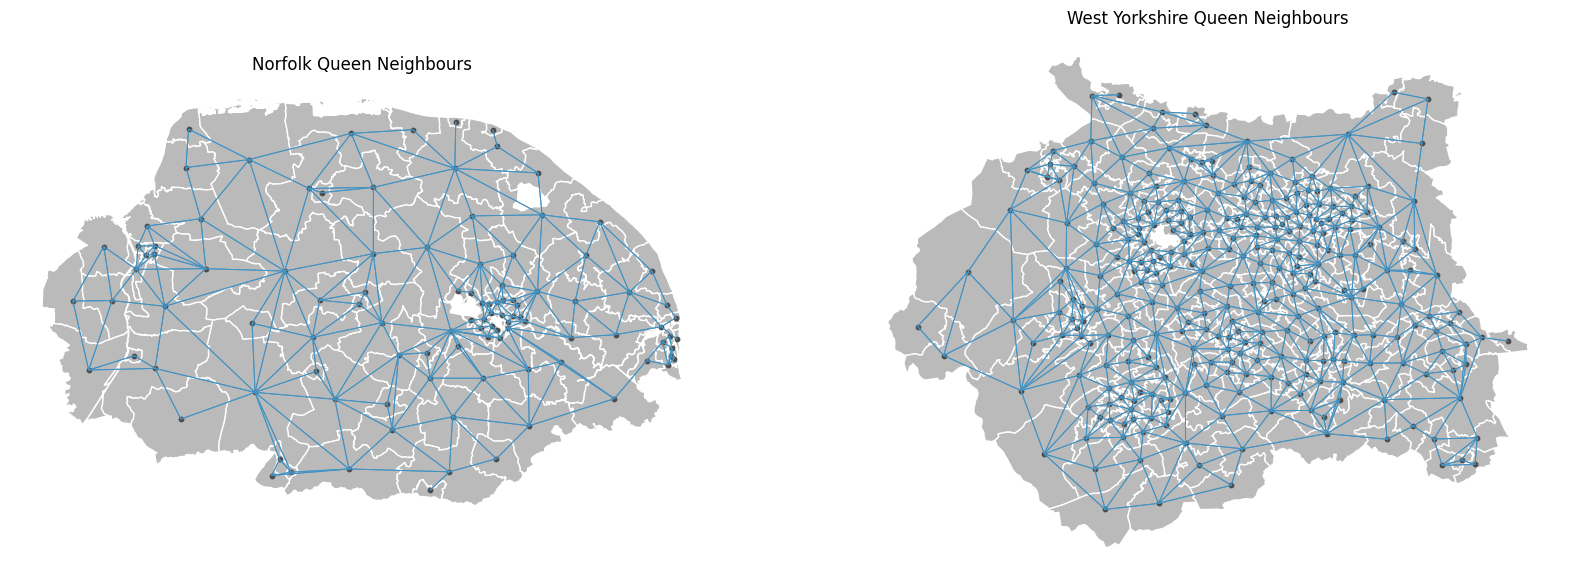

In [119]:
#Plotting the weights
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 16))

plot_spatial_weights(ax = ax1, w = w_queen_N, gdf = NORFOLK)
plot_spatial_weights(ax = ax2, w = w_queen_WY, gdf = WESTYORKSHIRE)

ax1.title.set_text('Norfolk Queen Neighbours')
ax2.title.set_text('West Yorkshire Queen Neighbours')

plt.show()

The white MSOAs which are missing data may have some impact on the analysis. Moran's I will now be calculated to check for spatial autocorrelation.

##Calculating Moran's I


Norfolk:

In [120]:
#Calculating Morans I for Norfolk
queenmiN = esda.Moran(NORFOLK['Total annual income (£)'], w_queen_N)
print(queenmiN.I)
print(queenmiN.p_sim)

0.3626584917170945
0.001


(<Figure size 700x700 with 1 Axes>,
 <Axes: title={'center': 'Moran Scatterplot (0.36)'}, xlabel='Attribute', ylabel='Spatial Lag'>)

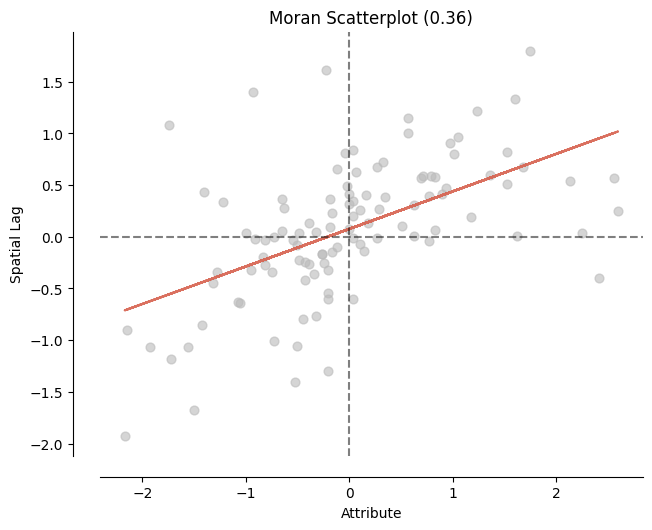

In [121]:
moran_scatterplot(queenmiN)

The Morans I score of 0.363 is statistically significant (p<0.05), indicating spatial autocorrelation the Norfolk data.

West Yorkshire:

In [122]:
#Calculating Morans I for West Yorkshire
queenmiWY = esda.Moran(WESTYORKSHIRE['Total annual income (£)'], w_queen_WY)
print(queenmiWY.I)
print(queenmiWY.p_sim)

0.5212147469463546
0.001


(<Figure size 700x700 with 1 Axes>,
 <Axes: title={'center': 'Moran Scatterplot (0.52)'}, xlabel='Attribute', ylabel='Spatial Lag'>)

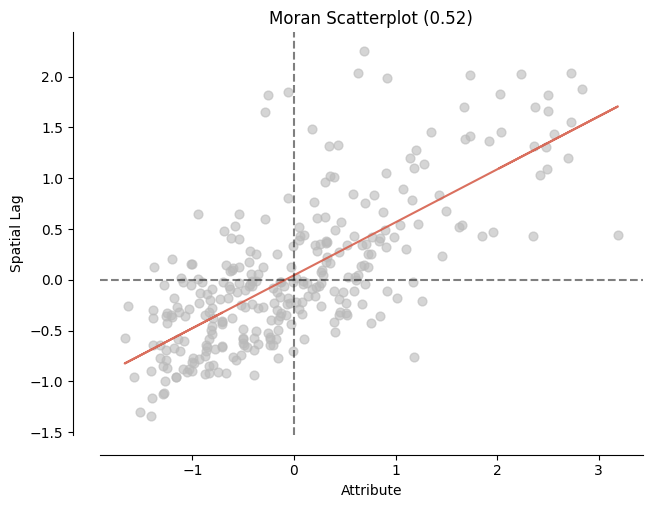

In [123]:
moran_scatterplot(queenmiWY)

The Morans I score of 0.521 is statistically significant (p<0.05), also indicating spatial autocorrelation the West Yorkshire data. Spatial autocorrelation is stronger in the West Yorkshire dataset, but this could be due to the larger sample size.

##Plotting Local Indicators of Spatial Autocorrelation

Norfolk:

In [124]:
#Norfolk queen LISA clusters
Nqueenlisa = esda.Moran_Local(NORFOLK['Total annual income (£)'], w_queen_N)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

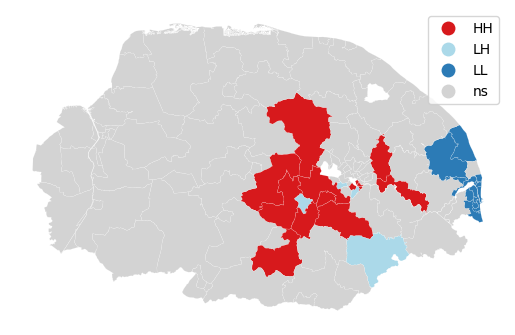

In [125]:
lisa_cluster(Nqueenlisa, NORFOLK)

The LISA map for Norfolk shows high-high clusters mostly around the Norwich MSOAs, and some MSOAs in South Norfolk. Low-low MSOAs are clustered around Great Yarmouth on the Eastern coast, indicating that low income MSOAs are surrounded by other low income MSOAs. There are a few low-high MSOAs which are low values surrounded by high values. The entire Western side of Norfolk shows non-significant spatial autocorrelation.

Spatial autocorrelation in the residuals will now be checked and plotted.


In [126]:
NORFOLK['Resids'] = Norfolk_mult_reg_model.resid

(<Figure size 640x480 with 1 Axes>, <Axes: >)

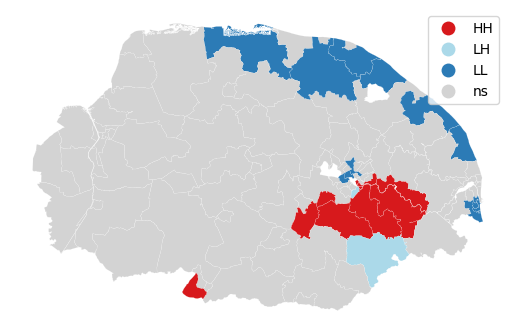

In [127]:
#Calculate LISA values
lisa = esda.Moran_Local(NORFOLK['Resids'], w_queen_N)
lisa_cluster(lisa, NORFOLK)

In [128]:
mi = esda.Moran(NORFOLK['Resids'], w_queen_N)
print(mi.I)
print(mi.p_sim)

0.3341093280162339
0.001


Plotting the spatial autocorrelation in the residuals has shown spatial clustering of the model's errors. The Norfolk coastal MSOAs show low residuals to be clustered together, and south of Norwich shows high residuals to be clustered together. Calculating Moran's I for the residuals of the Norfolk income data indicated spatial correlation, as the value is 0.334 and is statistically significant (p<0.05).

Geographically weighted regression would therefore be an appropriate method of analysis for this data.

West Yorkshire:

In [129]:
#West Yorkshire queen LISA clusters
WYqueenlisa = esda.Moran_Local(WESTYORKSHIRE['Total annual income (£)'], w_queen_WY)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

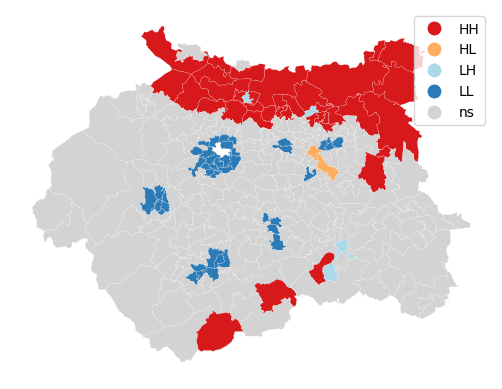

In [130]:
lisa_cluster(WYqueenlisa, WESTYORKSHIRE)

The LISA map of West Yorkshire shows a large clustering of red along the top boarder, where high values are surrounded by high values. There are low values surrounded by low values around Bradford, Halifax, Huddersfield and Leeds. There are a few more sporadic values but many MSOAs are shows as non-significant.



In [131]:
WESTYORKSHIRE['Resids'] = WestYor_mult_reg_model.resid

(<Figure size 640x480 with 1 Axes>, <Axes: >)

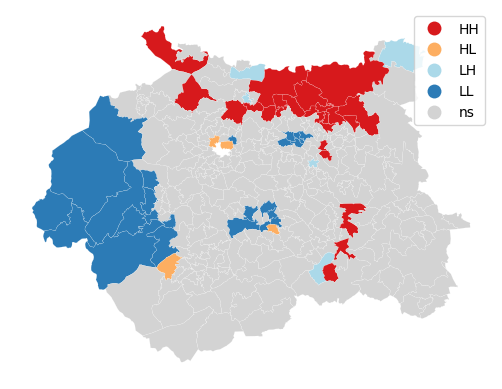

In [132]:
#calculate the lisa values
lisa = esda.Moran_Local(WESTYORKSHIRE['Resids'], w_queen_WY)
lisa_cluster(lisa, WESTYORKSHIRE)

In [133]:
mi = esda.Moran(WESTYORKSHIRE['Resids'], w_queen_WY)
print(mi.I)
print(mi.p_sim)

0.31059390546299476
0.001


Plotting the residuals and calculating Moran's I has found even stronger spatial autocorrelation for West Yorkshire, as the score is 0.311 and is again statistically significant (p<0.05).

Both datasets display spatial autocorrelation and the residuals are independent and identically distributed. A geographically weighted regression model will therefore be an appropriate choice for analysis, as it will capture the spatial variation in the data.

##Geographically Weighted Regression (GWR)

The equation for GWR is:

$$ y_i (u)= β_0i (u)+β_1i (u) x_1i+…+β_mi (u) x_mi $$

A new geodataframe will be created to be used in GWR models. These will not include the dummy RUC variables because it is advised not to include categorical predictors in GWR as they will be multicollinear. Private transport proportion will continue to be excluded, as it was in the OLS multiple regression model due to its high multicollinearity with car access.

Norfolk:

In [134]:
#Creating the new geodataframe with the necessary variables
NORFOLK_GWR = NORFOLK[['MSOA code', 'Total annual income (£)', 'Proportion with car access', 'Public Transport Prop',
                       'Active Transport Prop', 'geometry', 'LAT', 'LONG']]

In [135]:
#Creating the coordinates, x and y variables
N_g_coords = list(zip(NORFOLK_GWR['LONG'], NORFOLK_GWR['LAT']))
N_GWR_y = NORFOLK_GWR['Total annual income (£)'].values.reshape((-1,1))
N_GWR_X = NORFOLK_GWR[['Proportion with car access', 'Public Transport Prop', 'Active Transport Prop']].values.reshape(-1,3)

In [136]:
#Calculating the bandwidth - using spherical = False as crs is 27700
N_gwr_selector = Sel_BW(N_g_coords, N_GWR_y, N_GWR_X, spherical = False)
N_GWR_bw = N_gwr_selector.search()
print(N_GWR_bw)

64.0


In [137]:
#Fitting the model
N_GWR_results = GWR(N_g_coords, N_GWR_y, N_GWR_X, N_GWR_bw).fit()
N_GWR_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 107
Number of covariates:                                                     4

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                       1156300811.955
Log-likelihood:                                                   -1018.294
AIC:                                                               2044.589
AICc:                                                              2047.183
BIC:                                                           1156300330.654
R2:                                                                   0.555
Adj. R2:                                                              0.542

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- --

The R-Squared value improves from the OLS model of 0.555 to 0.695. This indicates that 69.5% of the variation in income is explained by the predictors in the GWR model. The AICc decreases very slightly with the GWR model, from 2047.2, to 2030.5, which indicates better performance in the GWR model albeit small.

The intercept in the OLS model is £-46287.64, which is the estimated in come when all other variables are held constant. The predictors are all positive and statistically significant, indicating that MSOAs average income will increase when the proportion of those with access to a car increases, and with both public and active TTW methods. The GWR show the coefficients for each predictor at all the locations (MSOAs). There is less variation in X3 (active transport) than there is in X2 (public transport) and X1 (car access).

The large, strong mean of the X2 coefficient (car access: £104234.86) indicates how important it is, for income, to have access to a car in Norfolk. The public transport result has a massive range in its spatial results (min = £74335.63, max = £124801.06). This may show how income in some MSOAs is affected dramatically differently by public transport than in other MSOAs.   


The changes from the global OLS coefficient results to the GWR means indicate there is spatial variation across Norfolk for income and its transport predictors. These coefficients will be mapped to visualise the variation over space.


In [138]:
#Adding the coefficients to the df to plot
NORFOLK_GWR['GWR_Coefficient'] = N_GWR_results.params[:,0]
NORFOLK_GWR['GWR_Car_prop'] = N_GWR_results.params[:,1]
NORFOLK_GWR['GWR_PublicTr_prop'] = N_GWR_results.params[:,2]
NORFOLK_GWR['GWR_ActiveTr_prop'] = N_GWR_results.params[:,3]

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

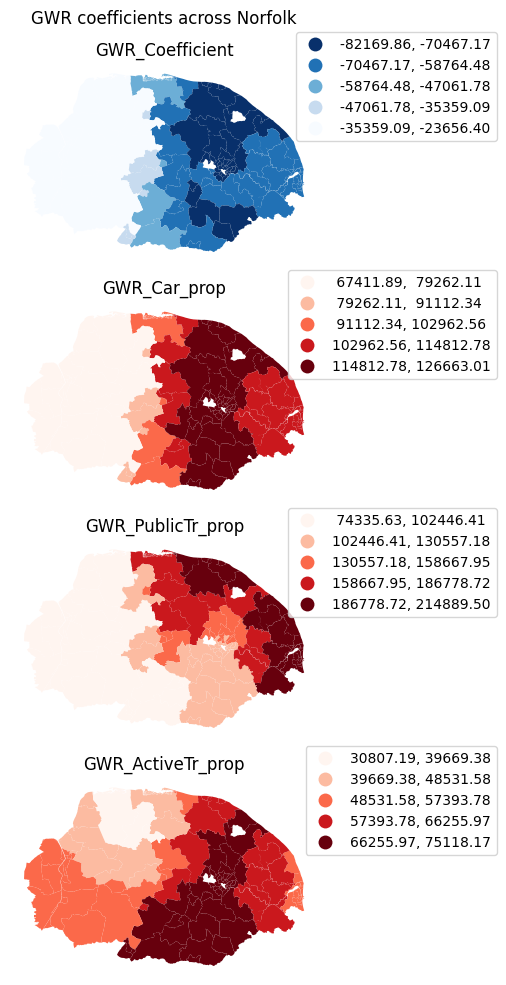

In [139]:
#Plotting all
figNGWR, axes = plt.subplots(nrows = 4, ncols = 1, figsize=(10,10))
figNGWR.suptitle('GWR coefficients across Norfolk')
NORFOLK_GWR.plot(column='GWR_Coefficient', ax=axes[0], cmap = 'Blues_r', scheme = 'equalinterval', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.60, 1.2)}).set_axis_off()
NORFOLK_GWR.plot(column='GWR_Car_prop', ax=axes[1], cmap = 'Reds', scheme = 'equalinterval', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.60, 1.2)}).set_axis_off()
NORFOLK_GWR.plot(column='GWR_PublicTr_prop', ax=axes[2], cmap = 'Reds', scheme = 'equalinterval', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.60, 1.2)}).set_axis_off()
NORFOLK_GWR.plot(column='GWR_ActiveTr_prop', ax=axes[3], cmap = 'Reds', scheme = 'equalinterval', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.60, 1.2)}).set_axis_off()
axes[0].set_title('GWR_Coefficient')
axes[1].set_title('GWR_Car_prop')
axes[2].set_title('GWR_PublicTr_prop')
axes[3].set_title('GWR_ActiveTr_prop')
plt.tight_layout()
plt.show()

The mapped coefficients show the impact of the predictors by location. Other than active transport, the western side of Norfolk has weak colouring in the coefficients, indicating the predictors do not have as much impact on income in these areas. This mapping is similar to Queen neighbours plot, where there were non-significant values for the same MSOAs. Car access is most intensely shaded in a vertical line through Norwich, and gets weaker either side. This similar to active transport. Public transport has less of a pattern, the impact of public transport on income is slightly more varied but this could be explained by the difference public transport services available in the specific areas.

The R-squared will be saved as a column and plotted, to indicate how well the model performs across Norfolk MSOAs.

In [140]:
#Saving the R-squared as a column to plot
NORFOLK_GWR['GWR_R2'] = N_GWR_results.localR2

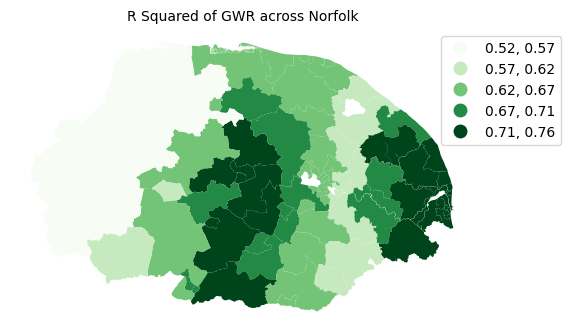

In [141]:
#Plotting the R2
fig, ax = plt.subplots(figsize=(6, 6))
NORFOLK_GWR.plot(column='GWR_R2', cmap = 'Greens', scheme = 'equalinterval', k=5, ax=ax, legend = True, legend_kwds={'bbox_to_anchor':(1.2, 1)})
ax.set_title('R Squared of GWR across Norfolk', fontsize=10)
ax.set_axis_off()
plt.show()

The plot shows how well the model predicts income in the different MSOAs. It appears to predict best on the eastern most MSOAs, and those in the centre of Norfolk, and varies in between. The western most MSOAs have the lowest R-Squared scores, which is inline with the coefficient data plotted above, where the effects were weakest in the same areas. Overall the scores range from 0.52 to 0.76 which is respectable.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

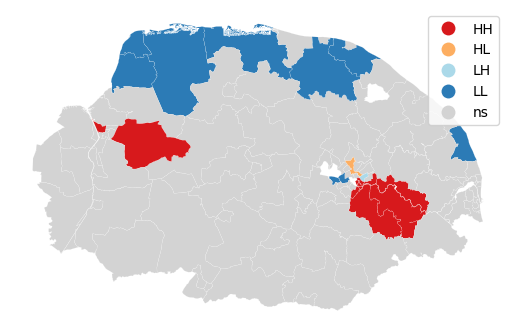

In [142]:
#Calculating residuals and plotting
NORFOLK_GWR['GWR_resid'] = N_GWR_results.resid_response
lisa = esda.Moran_Local(NORFOLK_GWR['GWR_resid'], w_queen_N)
lisa_cluster(lisa, NORFOLK_GWR)

In [143]:
#New Moran's I
mi = esda.Moran(NORFOLK_GWR['GWR_resid'], w_queen_N)
print(mi.I)
print(mi.p_sim)

0.24226754257707742
0.001


The new Moran's I score after GWR of 0.242 is statistically significant (p<0.05) and has decreased from the OLS Norfolk model, which was 0.363. There does not appear to be much visual reduction in the plotted residuals.

A GWR model is now fitted for West Yorkshire:

In [144]:
#Creating the new geodataframe with the necessary variables
WESTYORKSHIRE_GWR = WESTYORKSHIRE[['MSOA code', 'Total annual income (£)', 'Proportion with car access', 'Public Transport Prop',
                       'Active Transport Prop', 'geometry', 'LAT', 'LONG']]

In [145]:
#Creating the coordinates, x and y variables
WY_g_coords = list(zip(WESTYORKSHIRE_GWR['LONG'], WESTYORKSHIRE_GWR['LAT']))
WY_GWR_y = WESTYORKSHIRE_GWR['Total annual income (£)'].values.reshape((-1,1)) # reshape is needed to have column array
WY_GWR_X = WESTYORKSHIRE_GWR[['Proportion with car access', 'Public Transport Prop', 'Active Transport Prop']].values.reshape((-1,3))

In [146]:
#Calculating the bandwidth - using spherical = False as crs is 27700
WY_gwr_selector = Sel_BW(WY_g_coords, WY_GWR_y, WY_GWR_X, spherical = False)
WY_GWR_bw = WY_gwr_selector.search()
print(WY_GWR_bw)

53.0


In [147]:
#Fitting the model
WY_GWR_results = GWR(WY_g_coords, WY_GWR_y, WY_GWR_X, WY_GWR_bw).fit()
WY_GWR_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 297
Number of covariates:                                                     4

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                       5268674171.408
Log-likelihood:                                                   -2900.085
AIC:                                                               5808.169
AICc:                                                              5810.375
BIC:                                                           5268672503.145
R2:                                                                   0.760
Adj. R2:                                                              0.757

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- --

The R-Squared of the global OLS model is 0.76. This increases to 0.90 in the GWR. This is a great improvement, and means that 90% of the variation of income in West Yorkshire can be explained by the predictors, while capturing the spatial variation in the data. The decrease from the global OLS AICc from 5810.4 to 5657.7 with the GWR indicates the GWR has a better performance for this observed spatial data.

The global OLS model intercept is £-69072.42. Again, the predictors are all positive and statistically significant. X1 (car access) has the largest coefficient (£120,200), which makes sense as West Yorkshire overall did not have a consistent level of car access in MSOAs, therefore where the car access proption is higher, the effect on income will be larger. This predictor has the largest range in the GWR results (min = £35821.28, max = £172699.85). X2 (public transport: £67193.78) and X3 (active transport: £59104.78) have similar ranges in their means. This demonstrates that there is less spatial variation of income over West Yorkshire with these two predictors. The coefficients will be mapped for visualisation.

In [148]:
#Adding the coefficients to the df to plot
WESTYORKSHIRE_GWR['GWR_Coefficient'] = WY_GWR_results.params[:,0]
WESTYORKSHIRE_GWR['GWR_Car_prop'] = WY_GWR_results.params[:,1]
WESTYORKSHIRE_GWR['GWR_PublicTr_prop'] = WY_GWR_results.params[:,2]
WESTYORKSHIRE_GWR['GWR_ActiveTr_prop'] = WY_GWR_results.params[:,3]

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

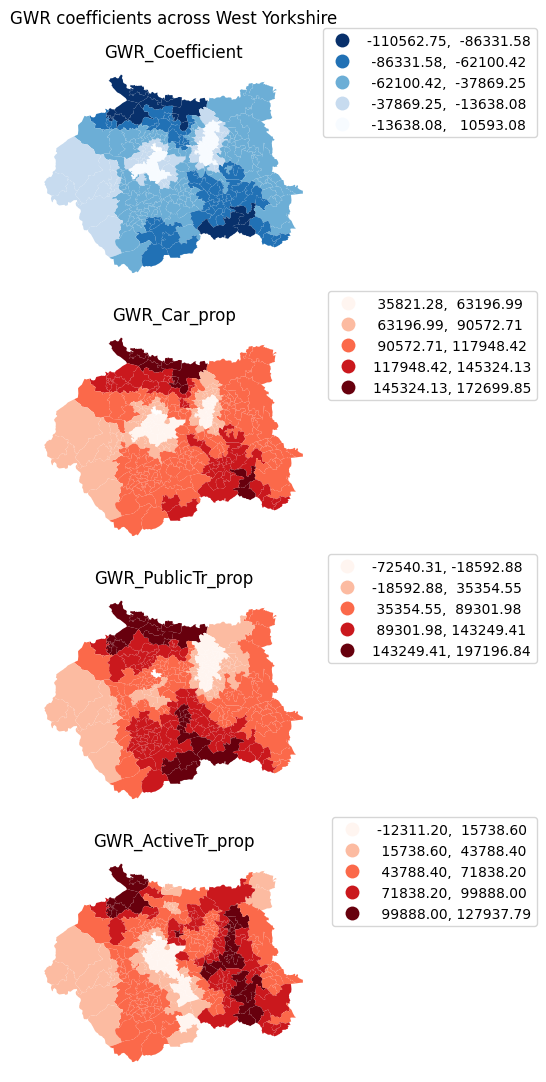

In [149]:
#Plotting all
figWYGWR, axes = plt.subplots(nrows = 4, ncols = 1, figsize=(11,11))
figWYGWR.suptitle('GWR coefficients across West Yorkshire')
WESTYORKSHIRE_GWR.plot(column='GWR_Coefficient', ax=axes[0], cmap = 'Blues_r', scheme = 'equalinterval', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.8, 1.2)}).set_axis_off()
WESTYORKSHIRE_GWR.plot(column='GWR_Car_prop', ax=axes[1], cmap = 'Reds', scheme = 'equalinterval', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.8, 1.2)}).set_axis_off()
WESTYORKSHIRE_GWR.plot(column='GWR_PublicTr_prop', ax=axes[2], cmap = 'Reds', scheme = 'equalinterval', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.8, 1.2)}).set_axis_off()
WESTYORKSHIRE_GWR.plot(column='GWR_ActiveTr_prop', ax=axes[3], cmap = 'Reds', scheme = 'equalinterval', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.8, 1.2)}).set_axis_off()
axes[0].set_title('GWR_Coefficient')
axes[1].set_title('GWR_Car_prop')
axes[2].set_title('GWR_PublicTr_prop')
axes[3].set_title('GWR_ActiveTr_prop')
plt.tight_layout()
plt.show()

Mapping the GWR results draws some interesting points. Car access has the greatest effect on income in the North-west and South-eastern most parts of West Yorkshire. The lightest shading are in the MSOAs surrounding Leeds and Bradford, where car access was at its least. This is where the model does not perform as well at predicting income with car access. A similar shading pattern is seen with the public transport data. Income is best predicted by active transport in a vertical strip down from around Leeds to Wakefield.  

The R-squared will be saved as a column and plotted, to indicate how well the model performs across West Yorkshire MSOAs in predicting income.

In [150]:
#Saving the R-squared as a column to plot
WESTYORKSHIRE_GWR['GWR_R2'] = WY_GWR_results.localR2

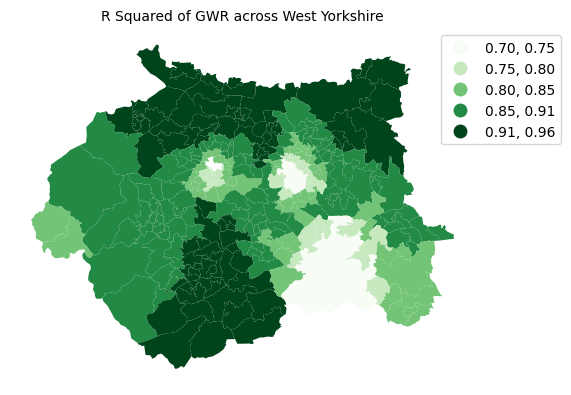

In [151]:
#Plotting the R2
fig, ax = plt.subplots(figsize=(6, 6))
WESTYORKSHIRE_GWR.plot(column='GWR_R2', cmap = 'Greens', scheme = 'equalinterval', k=5, ax=ax, legend = True, legend_kwds={'bbox_to_anchor':(1.2, 1)})
ax.set_title('R Squared of GWR across West Yorkshire', fontsize=10)
ax.set_axis_off()
plt.show()

With a R-Squared scores ranging from 0.70 to 0.96, this indicates that the model is very good at predicting income for West Yorkshire MSOAs. It has higher predictive power in the northern most MSOAs and Southern. It is slightly lower in the centre but overall still provides very strong R-Squared scores.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

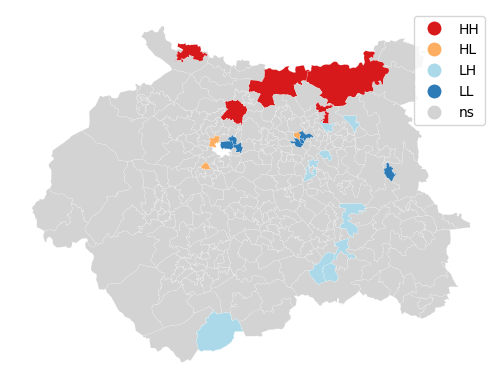

In [152]:
#Calculating residuals and plotting
WESTYORKSHIRE_GWR['GWR_resid'] = WY_GWR_results.resid_response
lisa = esda.Moran_Local(WESTYORKSHIRE_GWR['GWR_resid'], w_queen_WY)
lisa_cluster(lisa, WESTYORKSHIRE_GWR)

In [153]:
#New Moran's I
mi = esda.Moran(WESTYORKSHIRE_GWR['GWR_resid'], w_queen_WY)
print(mi.I)
print(mi.p_sim)

0.06206525493305279
0.031


The new Moran's I score after GWR of 0.062. This is a marked reduction from 0.531 before the geographic variation of the data had been considered. The p-value is slightly larger than usual, but is still statistically significant (p<0.05). There is a decrease in the MSOAs which are plotted on the residual map, indicating that the GWR captures the spatial autocorrelation in the data.

In answer to research question 4 (Can income be explained by transport methods in Norfolk and West Yorkshire?) the GWR model successfully captures spatial variation in the Norfolk and West Yorkshire datasets, where income is the dependent variable, and the exploratory variables are related to transport methods. Mapping the coefficients has also displayed how this spatial variation has a stronger impact in the more urban county of West Yorkshire, than it does in Norfolk, which is more rural.

# Discussion



The methodological approach of this mini project includes some shortfalls. First, the dates of which the data was collected may be slightly problematic. The income data was most recently available for March 2020, which is over a year prior to the 2021 census. Moreover, the census data was in the midst of a pandemic, so society was reacting to many life, economic and transport changes. A large number of observations included people who were working from home, but they were excluded from analysis in this project as they were not relevant. This exclusion was not accounted for in the income dataset as those specific observations were unable to be removed, but no doubt those working from home made up a significant proportion of the original census income data.  

Second, the variable choices could be questioned. The analysis included a small selection of variables, but there are many more which are likely to impact income and transport usage, for example, age, education level and occupation. This was noted in the background literature with the Tramlink study by Cuthill et al. (2019), however such variables were not included in the extracted data from the ONS website. Also, as this study was at the MSOA level, it would have been difficult to include such variables. The income variable may also be slightly problematic, as the smallest level it was available at was MSOA. This includes a large number of households, and is an average annual household income estimate. So, in real life there will be a much larger variation within MSOAs which is not accounted for in this study. Nevertheless, income data was available at the smallest granularity of MSOA so it had to be used, and significant findings were still produced.  

Finally, the wrangling of the variables may be over-aggregated, however this was limited as much as possible. Creating proportions of vehicle access and TTW methods made logical sense to be able to include them in GWR, and when the proportions were plotted on choropleth maps they made spatial and visual sense too. For the GWR, the predictor variables were all aggregated to the same level to avoid the risk of ecological fallacy. The Geographically Weighted Regression was a successful analytical mechanism which was used to explore the relationship between income and transport in Norfolk and West Yorkshire. Its performance at capturing the spatial variation in the data was stronger in West Yorkshire than in Norfolk, but overall the results showed that the more urban county (West Yorkshire) had more local variability in the relationship between the transport predictors and income. The overarching aim of the project was to investigate if income is significantly affected by transport, and for this data, the aim was achieved.

Future research should seek to include more demographic and exploratory variables, and to examine other contexts and areas. As the data was recorded in 2020 and 2021, transport policies, income and the relationships between the two have already changed. However, it can be argued that access to private, public and active transport is important in accessing employment opportunities for many different people. There are benefits and drawbacks to the different kinds of transport, but this project hopes to have highlighted that urban and rural counties will benefit from transport infrastructure and policy improvements.

# Conclusion


To conclude this mini project, it can be said that the relationship between income and transport is worth investigating. Data science methods have been used to demonstrate this importance with the study of Norfolk and West Yorkshire. Norfolk was chosen as Burke and Jones (2019) argued that rural areas are often overlooked, but its comparison to the more urban county of West Yorkshire has produced some interesting results for both counties. The counties differ in their transport systems, but the more urban county of West Yorkshire has strong evidence, found in this mini project, that income can be explained by transport methods and usage.


# References

Burke, A. and Jones, A. 2019. The development of an index of rural deprivation: A case study of Norfolk, England. Social Science & Medicine. [Online]. 227, pp.93–103. [Accessed 10 January 2025]. Available from: https://doi.org/10.1016/j.socscimed.2018.09.019

Cuthill, N., Cao, M., Liu, Y., Gao, X. and Zhang, Y. 2019. The association between Urban Public Transport Infrastructure and social equity and Spatial Accessibility within the urban environment: An investigation of Tramlink in London. Sustainability. [Online]. 11(5), p.1229. [Accessed 9 January 2025]. Available from: https://doi.org/10.3390/su11051229

Lucas, K. 2012. Transport and social exclusion: Where are we now? Transport Policy. [Online]. 20, pp.105–113. [Accessed 13 January 2025]. Available from: https://doi.org/10.1016/j.tranpol.2012.01.013

Mattioli, G., Lucas, K. and Marsden, G. 2017. Transport poverty and fuel poverty in the UK: From analogy to comparison. Transport Policy. [Online]. 59, pp.93–105. [Accessed 9 January 2025]. Available from: https://doi.org/10.1016/j.tranpol.2017.07.007

McCann, P. 2019. Perceptions of regional inequality and the geography of discontent: Insights from the UK. Regional Studies. [Online]. 54(2), pp.256–267. [Accessed 9 January 2025]. Available from: https://doi.org/10.1080/00343404.2019.1619928)

In [154]:
# from google.colab import drive
# drive.mount('/content/drive')

In [155]:
#!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc

In [157]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/GEOG5302M_201414310_UDSMP.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/GEOG5302M_201414310_UDSMP.ipynb to pdf
[NbConvertApp] Support files will be in GEOG5302M_201414310_UDSMP_files/
[NbConvertApp] Making directory ./GEOG5302M_201414310_UDSMP_files
[NbConvertApp] Writing 267533 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 2491491 bytes to /content/drive/MyDrive/Colab Notebooks/GEOG5302M_201414310_UDSMP.pdf
